## Этап 1 — Настройка окружения (импорты, сиды, параметры отображения)


In [ ]:
# ===== Этап 1: Environment setup =====
# Здесь мы:
# - импортируем библиотеки,
# - фиксируем сиды для воспроизводимости,
# - задаём базовые пути,
# - печатаем версии пакетов (полезно для отчёта/воспроизводимости).

import os
import sys
import json
import math
import random
import zipfile
from pathlib import Path

import numpy as np
import pandas as pd

# Для красивого вывода таблиц в Colab
from IPython.display import display

# --- Reproducibility ---
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# --- Pandas display options (чтобы было читабельно) ---
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 30)
pd.set_option("display.width", 140)

# --- Paths ---
WORK_DIR = Path("/content")
DATASET_DIR = WORK_DIR / "dataset_extracted"   # куда распакуем архив
DATASET_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Environment ready")
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("WORK_DIR:", WORK_DIR)
print("DATASET_DIR:", DATASET_DIR)

✅ Environment ready
Python: 3.12.12
pandas: 2.2.2
numpy: 2.0.2
WORK_DIR: /content
DATASET_DIR: /content/dataset_extracted


## Этап 2 — Загрузка архива через files.upload() и распаковка

На этом шаге мы выбираем `science_events_dataset_processed.zip` (или аналогичный) с компьютера.  
После распаковки мы покажем список файлов и убедимся, что таблицы на месте.


In [ ]:
# ===== Этап 2: Upload + unzip =====
# Важно: files.upload() работает интерактивно (выбираешь файл в диалоге).
# Если архив уже лежит в /content, можно пропустить upload и указать путь вручную.

from google.colab import files

def human_size(n_bytes: int) -> str:
    """Человекочитаемый размер файла."""
    if n_bytes is None:
        return "?"
    units = ["B", "KB", "MB", "GB"]
    size = float(n_bytes)
    for u in units:
        if size < 1024 or u == units[-1]:
            return f"{size:.2f} {u}"
        size /= 1024

# 1) Upload
uploaded = files.upload()  # пользователь выбирает zip
if not uploaded:
    raise RuntimeError("❌ Файл не был загружен. Повтори files.upload() и выбери .zip архив.")

# берём первый загруженный файл
zip_name = next(iter(uploaded.keys()))
zip_path = WORK_DIR / zip_name

print(f"✅ Uploaded: {zip_path} ({human_size(zip_path.stat().st_size)})")

# 2) Unzip (чистим папку, чтобы не мешали старые версии)
# Если хочешь сохранять старые распаковки — закомментируй блок очистки.
if DATASET_DIR.exists():
    for p in DATASET_DIR.rglob("*"):
        if p.is_file():
            p.unlink()
    # удаляем пустые папки снизу вверх
    for p in sorted([x for x in DATASET_DIR.rglob("*") if x.is_dir()], reverse=True):
        try:
            p.rmdir()
        except OSError:
            pass

DATASET_DIR.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(DATASET_DIR)

print("✅ Extracted to:", DATASET_DIR)

# 3) Show extracted file list (top-level + рекурсивно)
all_files = sorted([p for p in DATASET_DIR.rglob("*") if p.is_file()])

files_df = pd.DataFrame({
    "file": [str(p.relative_to(DATASET_DIR)) for p in all_files],
    "size": [human_size(p.stat().st_size) for p in all_files],
})
print(f"Found files: {len(files_df)}")
display(files_df.head(40))

# Подсказка: если файлов слишком много, покажем только интересные расширения
interesting = files_df[files_df["file"].str.lower().str.contains(r"\.(parquet|csv|json|md)$", regex=True)]
print("\nInteresting files (parquet/csv/json/md):", len(interesting))
display(interesting.head(60))

Saving science_events_dataset_processed.zip to science_events_dataset_processed (1).zip
✅ Uploaded: /content/science_events_dataset_processed (1).zip (4.59 MB)
✅ Extracted to: /content/dataset_extracted
Found files: 19


,file,size
0,dataset_card.md,623.00 B
1,event_kpi.csv,880.84 KB
2,event_kpi.parquet,269.82 KB
3,event_pages.csv,136.34 KB
4,event_pages.parquet,46.90 KB
5,events.csv,837.96 KB
6,events.parquet,251.88 KB
7,links.csv,455.51 KB
8,links.parquet,115.07 KB
9,participants.csv,1.50 MB



Interesting files (parquet/csv/json/md): 19


/tmp/ipython-input-4188375930.py:60: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  interesting = files_df[files_df["file"].str.lower().str.contains(r"\.(parquet|csv|json|md)$", regex=True)]


,file,size
0,dataset_card.md,623.00 B
1,event_kpi.csv,880.84 KB
2,event_kpi.parquet,269.82 KB
3,event_pages.csv,136.34 KB
4,event_pages.parquet,46.90 KB
5,events.csv,837.96 KB
6,events.parquet,251.88 KB
7,links.csv,455.51 KB
8,links.parquet,115.07 KB
9,participants.csv,1.50 MB


## Этап 3 — Загрузка таблиц в pandas и быстрый обзор

На этом шаге мы:
- находим нужные таблицы (предпочитаем `.parquet`, иначе `.csv`),
- читаем в DataFrame’ы,
- печатаем формы (shape), колонки и первые строки,
- делаем простую сводку "сколько строк в каждой таблице".

In [ ]:
# ===== Этап 3: Load tables =====
# Мы ожидаем таблицы примерно такого состава:
# events, tracks, event_pages, links, participants, registrations, submissions, reviews, event_kpi
#
# Читаем parquet (быстрее и типы лучше), если parquet нет — читаем csv.

EXPECTED_TABLES = [
    "events",
    "tracks",
    "event_pages",
    "links",
    "participants",
    "registrations",
    "submissions",
    "reviews",
    "event_kpi",
]

def find_table_file(table_name: str) -> Path | None:
    """Ищет файл таблицы: parquet предпочтительнее csv."""
    parquet = list(DATASET_DIR.rglob(f"{table_name}.parquet"))
    if parquet:
        return parquet[0]
    csv = list(DATASET_DIR.rglob(f"{table_name}.csv"))
    if csv:
        return csv[0]
    return None

def load_table(table_name: str) -> pd.DataFrame | None:
    fp = find_table_file(table_name)
    if fp is None:
        return None
    if fp.suffix.lower() == ".parquet":
        df = pd.read_parquet(fp)
    elif fp.suffix.lower() == ".csv":
        df = pd.read_csv(fp, encoding="utf-8-sig")
    else:
        return None
    return df

tables: dict[str, pd.DataFrame] = {}
missing = []

for t in EXPECTED_TABLES:
    df = load_table(t)
    if df is None:
        missing.append(t)
    else:
        tables[t] = df

print("✅ Loaded tables:", list(tables.keys()))
if missing:
    print("⚠️ Missing tables (not found in archive):", missing)

# Быстрый overview
overview = pd.DataFrame({
    "table": list(tables.keys()),
    "rows": [tables[k].shape[0] for k in tables.keys()],
    "cols": [tables[k].shape[1] for k in tables.keys()],
})
display(overview.sort_values("rows", ascending=False).reset_index(drop=True))

# Покажем краткую инфу по ключевым таблицам
def show_table_info(name: str, n=5):
    df = tables[name]
    print(f"\n=== {name} ===")
    print("shape:", df.shape)
    print("columns:", list(df.columns))
    display(df.head(n))

for name in ["events", "tracks", "links", "participants", "registrations"]:
    if name in tables:
        show_table_info(name, n=5)

# Мини-санити-чек: обязательные колонки (если таблица есть)
checks = []
if "events" in tables:
    ev = tables["events"]
    checks.append(("events.has_event_id", "event_id" in ev.columns))
    checks.append(("events.has_title", "title" in ev.columns))
    checks.append(("events.has_event_start", "event_start" in ev.columns))
if "registrations" in tables:
    rg = tables["registrations"]
    checks.append(("registrations.has_attended", "attended" in rg.columns))
    checks.append(("registrations.has_registered_at", "registered_at" in rg.columns))
if "tracks" in tables:
    tr = tables["tracks"]
    checks.append(("tracks.has_track_title", "track_title" in tr.columns))

print("\nSanity checks:")
for k, ok in checks:
    print(f" - {k}: {'OK' if ok else 'FAIL'}")

✅ Loaded tables: ['events', 'tracks', 'event_pages', 'links', 'participants', 'registrations', 'submissions', 'reviews', 'event_kpi']


,table,rows,cols
0,registrations,70906,6
1,reviews,38006,4
2,submissions,19003,6
3,participants,17403,6
4,links,4387,5
5,tracks,2016,3
6,event_pages,981,4
7,events,714,37
8,event_kpi,714,44



=== events ===
shape: (714, 37)
columns: ['event_id', 'source', 'lang', 'url_main', 'url_menu', 'title', 'subtitle', 'status', 'city', 'venue', 'event_start', 'event_end', 'start_time', 'end_time', 'event_duration_days', 'reg_status', 'reg_start', 'reg_end', 'reg_deadline_dt', 'reg_window_days', 'cost', 'organizers', 'languages', 'format', 'description_len', 'tracks_count', 'is_focus_university', 'parse_warnings', 'parser_version', 'scraped_at', 'completeness_score', 'event_year', 'event_month', 'has_tracks', 'has_reg_window', 'has_deadline', 'is_online_flag']


,event_id,source,lang,url_main,url_menu,title,subtitle,status,city,venue,event_start,event_end,start_time,end_time,event_duration_days,reg_status,reg_start,reg_end,reg_deadline_dt,reg_window_days,cost,organizers,languages,format,description_len,tracks_count,is_focus_university,parse_warnings,parser_version,scraped_at,completeness_score,event_year,event_month,has_tracks,has_reg_window,has_deadline,is_online_flag
0,10167,lomonosov-msu.ru,rus,https://lomonosov-msu.ru/rus/event/10167/,https://lomonosov-msu.ru/rus/event/10167/menu/,Севастопольская гавань-2026,<NA>,Проводится,"Севастополь, Россия",СевГУ,2026-04-28,2026-04-30,<NA>,<NA>,2.0,unknown,NaT,NaT,2026-02-28 23:59:00,NaN,Участие в конференции,Севастопольский государственный университет; М...,<NA>,remote_or_hybrid,5141,0,False,<NA>,v2.0-menu+main-privacy-safe,2025-12-18 15:56:26 UTC,1.0,2026,4,False,False,True,True
1,10166,lomonosov-msu.ru,rus,https://lomonosov-msu.ru/rus/event/10166/,https://lomonosov-msu.ru/rus/event/10166/menu/,Универсиада по методам обработки информации в ...,<NA>,Проводится,"Москва, Россия",МГУ,2025-12-22,2026-04-30,<NA>,<NA>,129.0,unknown,NaT,NaT,2025-04-13 23:59:00,NaN,бесплатно (регистрация обязательна),Московский государственный университет имени М...,<NA>,<NA>,1048,0,False,<NA>,v2.0-menu+main-privacy-safe,2025-12-18 15:56:26 UTC,1.0,2025,12,False,False,True,False
2,10165,lomonosov-msu.ru,rus,https://lomonosov-msu.ru/rus/event/10165/,https://lomonosov-msu.ru/rus/event/10165/menu/,Универсиада по предпринимательству и управлени...,<NA>,Проводится,"Москва, Россия",МГУ,2025-11-10,2026-01-12,<NA>,<NA>,63.0,unknown,NaT,NaT,NaT,NaN,Участие в Универсиады «,Московский государственный университет имени М...,<NA>,onsite_or_hybrid,808,0,False,<NA>,v2.0-menu+main-privacy-safe,2025-12-18 15:56:26 UTC,1.0,2025,11,False,False,False,False
3,10164,lomonosov-msu.ru,rus,https://lomonosov-msu.ru/rus/event/10164/,https://lomonosov-msu.ru/rus/event/10164/menu/,Универсиада по Физике Частиц и Атомных Ядер «Л...,<NA>,Проводится,"Москва, Россия",МГУ,2025-12-15,2026-04-30,<NA>,<NA>,136.0,unknown,NaT,NaT,2025-04-13 22:59:00,NaN,бесплатно (регистрация обязательна),Московский государственный университет имени М...,<NA>,<NA>,1285,0,False,<NA>,v2.0-menu+main-privacy-safe,2025-12-18 15:56:26 UTC,1.0,2025,12,False,False,True,False
4,10163,lomonosov-msu.ru,rus,https://lomonosov-msu.ru/rus/event/10163/,https://lomonosov-msu.ru/rus/event/10163/menu/,От Пушкина до наших дней,<NA>,Проводится,"Казань, Россия",КФУ,2025-12-01,2026-02-21,<NA>,<NA>,82.0,unknown,NaT,NaT,2025-02-01 23:59:00,NaN,Участие бесплатное,Казанский (Приволжский) федеральный университе...,<NA>,<NA>,350,0,False,<NA>,v2.0-menu+main-privacy-safe,2025-12-18 15:56:26 UTC,1.0,2025,12,False,False,True,False



=== tracks ===
shape: (2016, 3)
columns: ['event_id', 'track_no', 'track_title']


,event_id,track_no,track_title
0,10157,1,«Философия»
1,10157,2,«Религиоведение»
2,10157,3,«Культурология»
3,10157,4,«Реклама и связи с общественностью»
4,10157,5,«Прикладная этика»



=== links ===
shape: (4387, 5)
columns: ['event_id', 'link_type', 'link_title', 'url', 'source_part']


,event_id,link_type,link_title,url,source_part
0,10167,external,Ломоносов,https://lomonosov-msu.ru/rus/,menu
1,10167,external,Eng,https://lomonosov-msu.ru/eng/event/10167/menu/,menu
2,10167,external,Укр,https://lomonosov-msu.ru/ukr/event/10167/menu/,menu
3,10167,calendar,В Google календарь,http://www.google.com/calendar/event?action=TE...,menu
4,10167,external,Страница события,https://www.sevsu.ru/nauka/konferentsii-sevgu/...,menu



=== participants ===
shape: (17403, 6)
columns: ['participant_id', 'participant_uid', 'university', 'role', 'country', 'city']


,participant_id,participant_uid,university,role,country,city
0,1,cca2e34a5f1f5af1,МГУ имени М.В. Ломоносова,student,Кыргызстан,г. Кырен
1,2,e3b536649f3ef5c8,СПбГУ,master,Казахстан,клх Усинск
2,3,2677a29d71c79d6b,НИУ ВШЭ,industry,Россия,г. Вилюйск
3,4,cb728a5d93b89dc5,КФУ,student,Узбекистан,д. Камышин
4,5,97761a9c9221aee9,РЭУ им. Г.В. Плеханова,student,Россия,ст. Азов (Рост.)



=== registrations ===
shape: (70906, 6)
columns: ['registration_id', 'event_id', 'participant_id', 'registered_at', 'attended', 'feedback_score']


,registration_id,event_id,participant_id,registered_at,attended,feedback_score
0,1,10167,15874,2026-02-10 04:44:20,1,3.0
1,2,10167,4105,2026-02-02 21:37:14,1,4.0
2,3,10167,5132,2026-01-20 06:07:41,1,4.0
3,4,10167,8717,2026-02-18 16:37:51,0,<NA>
4,5,10167,1550,2026-02-13 17:19:24,1,4.0



Sanity checks:
 - events.has_event_id: OK
 - events.has_title: OK
 - events.has_event_start: OK
 - registrations.has_attended: OK
 - registrations.has_registered_at: OK
 - tracks.has_track_title: OK


По результатам этапов 0–3 всё выглядит очень здорово: архив корректный, структура полная (все 9 таблиц на месте), объёмы хорошие для быстрого обучения (70k регистраций — это уже "настоящая" база для классификации attended). Плюс приятно, что в events уже лежат производные поля (event_year, event_month, has_deadline, is_online_flag) — это ускорит следующий шаг.

Единственное, что прямо сейчас бросается в глаза: reg_start/reg_end/reg_window_days фактически пустые (NaT/NaN), а status и reg_status похоже почти константные (Проводится, unknown). Это не критично, просто в ML мы либо выкинем эти признаки, либо будем опираться на reg_deadline_dt. И ещё: текст описания мероприятия в processed-версии, судя по колонкам, не сохранён (есть только description_len), поэтому для "простого и эффективного" эксперимента будем считать, что текстовые фичи — это в основном title (и при желании чуть позже можно добавить более богатый текст).

## Этап 4 — Data Quality Audit (качество данных + целостность + базовые визуализации)

На этом этапе мы:
1) строим таблицу пропусков по ключевым полям,  
2) выявляем константные и "почти константные" признаки,  
3) проверяем целостность связей (orphan rows),  
4) смотрим базовые распределения (города/площадки/длительности/регистрации),  
5) делаем PII-сканер для строковых полей (email/телефон) и выдаём отчёт.

Результат: **data_quality_report.json** + несколько графиков, понятных человеку.


In [ ]:
# ===== Этап 4.1: Helpers for audit =====
import re
import matplotlib.pyplot as plt

REPORT_DIR = Path("/content/reports")
REPORT_DIR.mkdir(parents=True, exist_ok=True)

EMAIL_RE = re.compile(r"[A-Za-z0-9._%+\-]+@[A-Za-z0-9.\-]+\.[A-Za-z]{2,}")
PHONE_RE = re.compile(r"\+?\d[\d\-\s\(\)]{7,}\d")

def missing_report(df: pd.DataFrame, key_cols: list[str]) -> pd.DataFrame:
    """Таблица пропусков по выбранным колонкам."""
    rows = []
    n = len(df)
    for c in key_cols:
        if c not in df.columns:
            rows.append({"col": c, "missing": None, "missing_rate": None, "note": "NO_COLUMN"})
            continue
        miss = int(df[c].isna().sum())
        rows.append({"col": c, "missing": miss, "missing_rate": miss / n if n else None, "note": ""})
    out = pd.DataFrame(rows).sort_values(["missing_rate", "col"], ascending=[False, True])
    return out.reset_index(drop=True)

def constant_columns(df: pd.DataFrame, max_unique: int = 1) -> pd.DataFrame:
    """Колонки с числом уникальных <= max_unique (обычно 1 => константа)."""
    rows = []
    for c in df.columns:
        nun = df[c].nunique(dropna=False)
        if nun <= max_unique:
            sample = df[c].dropna().astype(str).head(1).tolist()
            rows.append({"col": c, "nunique": int(nun), "example_value": sample[0] if sample else None})
    return pd.DataFrame(rows).sort_values("col").reset_index(drop=True)

def top_values(df: pd.DataFrame, col: str, k: int = 10) -> pd.DataFrame:
    """Top-k значений по частоте (без NaN)."""
    if col not in df.columns:
        return pd.DataFrame(columns=[col, "count"])
    vc = df[col].dropna().astype(str).value_counts().head(k)
    return vc.rename_axis(col).reset_index(name="count")

def pii_scan_series(s: pd.Series) -> dict:
    """Считает сколько строк содержит email/phone."""
    txt = s.dropna().astype(str)
    return {
        "rows": int(len(s)),
        "non_null": int(txt.shape[0]),
        "email_hits": int(txt.apply(lambda x: bool(EMAIL_RE.search(x))).sum()),
        "phone_hits": int(txt.apply(lambda x: bool(PHONE_RE.search(x))).sum()),
    }

print("✅ Helpers ready")

✅ Helpers ready


,col,missing,missing_rate,note
0,reg_end,714,1.000000,
1,reg_start,714,1.000000,
2,format,530,0.742297,
3,reg_deadline_dt,54,0.075630,
4,city,0,0.000000,
5,cost,0,0.000000,
6,description_len,0,0.000000,
7,event_end,0,0.000000,
8,event_id,0,0.000000,
9,event_start,0,0.000000,


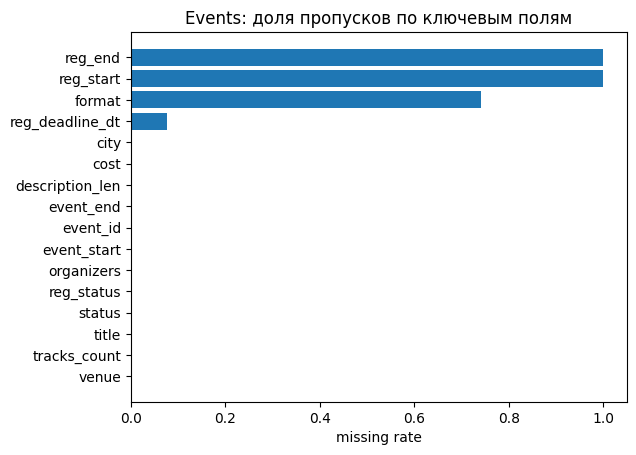

Constant columns in events (nunique<=1): 12


,col,nunique,example_value
0,has_reg_window,1,False
1,lang,1,rus
2,parse_warnings,1,None
3,parser_version,1,v2.0-menu+main-privacy-safe
4,reg_end,1,None
5,reg_start,1,None
6,reg_status,1,unknown
7,reg_window_days,1,None
8,scraped_at,1,2025-12-18 15:56:26 UTC
9,source,1,lomonosov-msu.ru


,count
status,
Проводится,714


,count
reg_status,
unknown,714


,city,count
0,"Москва, Россия",354
1,"Казань, Россия",31
2,"Барнаул, Россия",26
3,"Донецк, Россия",23
4,"Санкт-Петербург, Россия",21
5,"Новосибирск, Россия",17
6,"Севастополь, Россия",14
7,"Курск, Россия",12
8,"Тюмень, Россия",11
9,"Красноярск, Россия",11


,venue,count
0,МГУ,293
1,ДонГУ,21
2,КФУ,12
3,МУ имени С. Ю. Витте,11
4,РГУ им. А.Н.Косыгина,9
5,КГМУ,9
6,АлтГТУ,8
7,КИУ имени В.Г.Тимирясова,8
8,РГАУ МСХА им. К.А. Тимирязева,8
9,КГЭУ,6


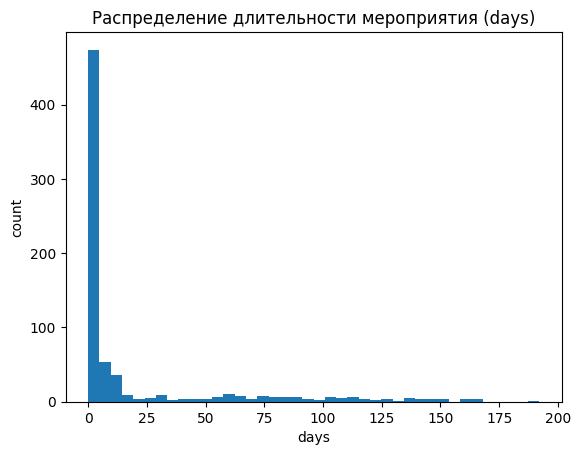

,event_id,title,event_start,event_end,event_duration_days,city,venue
51,10116,"Универсиада ""Ломоносов"" по лингвистике, регион...",2025-11-20,2026-05-31,192.0,"Москва, Россия",МГУ
11,10156,Универсиада по журналистике «Медиапроект»,2025-12-15,2026-05-31,167.0,"Москва, Россия",МГУ
692,9469,Универсиада по журналистике «Медиапроект»,2024-12-15,2025-05-31,167.0,"Москва, Россия",МГУ
301,9862,Аrs Sacra Audit 2025,2025-06-28,2025-12-11,166.0,"Москва, Россия",МГУ
684,9477,"Универсиада ""Ломоносов"" по социологии",2024-12-16,2025-05-31,166.0,"Москва, Россия",МГУ
686,9475,Универсиада по геологии [REDACTED_PHONE],2024-12-20,2025-05-31,162.0,"Москва, Россия",МГУ
29,10138,Универсиада по политологии,2025-12-22,2026-05-31,160.0,"Москва, Россия",МГУ
689,9472,Универсиада по политологии,2024-12-23,2025-05-31,159.0,"Москва, Россия",МГУ
75,10092,Конкурс краеведческих математических задач для...,2025-11-20,2026-04-20,151.0,"Казань, Россия",КФУ
701,9460,Универсиада по экономической и финансовой стра...,2024-12-15,2025-05-15,151.0,"Москва, Россия",МГУ


In [ ]:
# ===== Этап 4.2: Events — пропуски, константы, распределения =====
events = tables["events"].copy()
tracks = tables["tracks"].copy()
links = tables["links"].copy()
pages = tables["event_pages"].copy()
participants = tables["participants"].copy()
registrations = tables["registrations"].copy()
submissions = tables["submissions"].copy()
reviews = tables["reviews"].copy()
event_kpi = tables["event_kpi"].copy()

# --- Missingness for events (ключевые поля) ---
EVENT_KEY_COLS = [
    "event_id", "title", "city", "venue", "event_start", "event_end",
    "reg_deadline_dt", "cost", "organizers", "format",
    "tracks_count", "description_len",
    "status", "reg_status", "reg_start", "reg_end"
]
miss_events = missing_report(events, EVENT_KEY_COLS)
display(miss_events)

# --- Plot missingness (только где есть данные) ---
plot_df = miss_events.dropna(subset=["missing_rate"]).copy()
plot_df = plot_df.sort_values("missing_rate", ascending=False).head(18)

plt.figure()
plt.barh(plot_df["col"], plot_df["missing_rate"])
plt.title("Events: доля пропусков по ключевым полям")
plt.xlabel("missing rate")
plt.gca().invert_yaxis()
plt.show()

# --- Constant columns in events ---
const_ev = constant_columns(events, max_unique=1)
print("Constant columns in events (nunique<=1):", len(const_ev))
display(const_ev)

# --- Distributions: status / reg_status ---
if "status" in events.columns:
    display(events["status"].value_counts(dropna=False).head(20))
if "reg_status" in events.columns:
    display(events["reg_status"].value_counts(dropna=False).head(20))

# --- Top cities/venues ---
display(top_values(events, "city", 10))
display(top_values(events, "venue", 10))

# --- Event duration sanity (нормально увидеть хвосты) ---
if "event_duration_days" in events.columns:
    dur = pd.to_numeric(events["event_duration_days"], errors="coerce").dropna()
    plt.figure()
    plt.hist(dur, bins=40)
    plt.title("Распределение длительности мероприятия (days)")
    plt.xlabel("days")
    plt.ylabel("count")
    plt.show()

    # Топ-10 самых длинных (для проверки "не баг ли")
    long_ev = events.sort_values("event_duration_days", ascending=False).head(10)[
        ["event_id","title","event_start","event_end","event_duration_days","city","venue"]
    ]
    display(long_ev)

In [ ]:
# ===== Этап 4.3: Целостность связей между таблицами (orphan rows) =====
ev_ids = set(events["event_id"].dropna().astype(int).tolist())

def orphan_count(df: pd.DataFrame, col="event_id") -> int:
    if col not in df.columns:
        return 0
    return int((~df[col].dropna().astype(int).isin(ev_ids)).sum())

orphan = {
    "tracks_orphan": orphan_count(tracks),
    "links_orphan": orphan_count(links),
    "pages_orphan": orphan_count(pages),
    "registrations_orphan": orphan_count(registrations),
    "submissions_orphan": orphan_count(submissions),
}
print(json.dumps(orphan, ensure_ascii=False, indent=2))

# Проверка participant_id связности
pid_set = set(participants["participant_id"].dropna().astype(int).tolist())
regs_pid_orphan = int((~registrations["participant_id"].dropna().astype(int).isin(pid_set)).sum())
subs_pid_orphan = int((~submissions["participant_id"].dropna().astype(int).isin(pid_set)).sum())

print("registrations orphan participant_id:", regs_pid_orphan)
print("submissions orphan participant_id:", subs_pid_orphan)

# Проверка reviews -> submissions
sub_ids = set(submissions["submission_id"].dropna().astype(int).tolist())
rev_orphan = int((~reviews["submission_id"].dropna().astype(int).isin(sub_ids)).sum())
print("reviews orphan submission_id:", rev_orphan)

{
  "tracks_orphan": 0,
  "links_orphan": 0,
  "pages_orphan": 0,
  "registrations_orphan": 0,
  "submissions_orphan": 0
}
registrations orphan participant_id: 0
submissions orphan participant_id: 0
reviews orphan submission_id: 0


event_kpi shape: (714, 44)
event_kpi columns (first 30): ['event_id', 'source', 'lang', 'url_main', 'url_menu', 'title', 'subtitle', 'status', 'city', 'venue', 'event_start', 'event_end', 'start_time', 'end_time', 'event_duration_days', 'reg_status', 'reg_start', 'reg_end', 'reg_deadline_dt', 'reg_window_days', 'cost', 'organizers', 'languages', 'format', 'description_len', 'tracks_count', 'is_focus_university', 'parse_warnings', 'parser_version', 'scraped_at']
✅ Present KPI metrics: ['reg_count', 'attended_count', 'avg_feedback', 'submissions', 'accepted', 'attendance_rate', 'accept_rate']


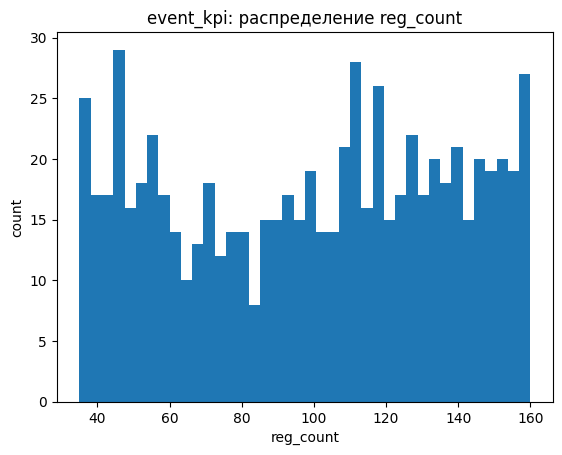

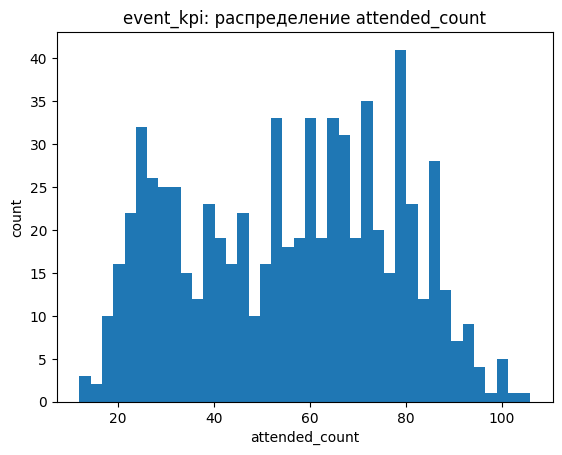

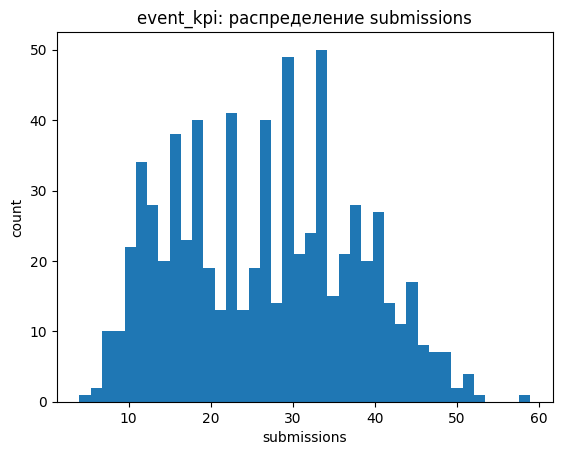

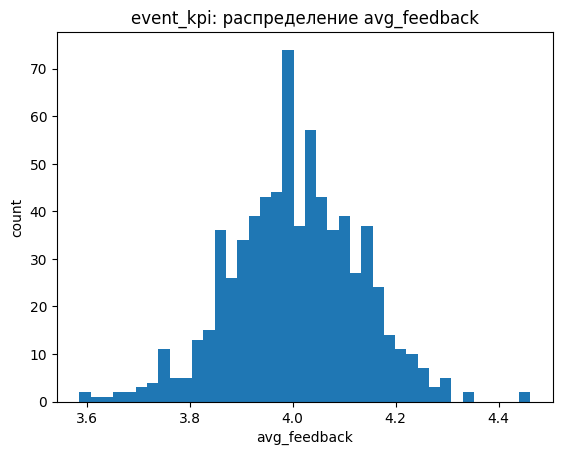

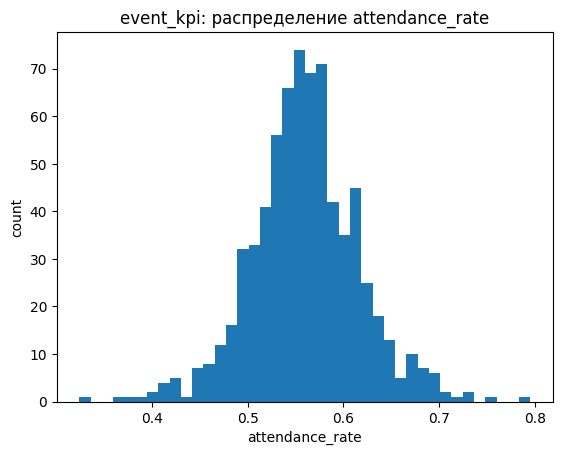

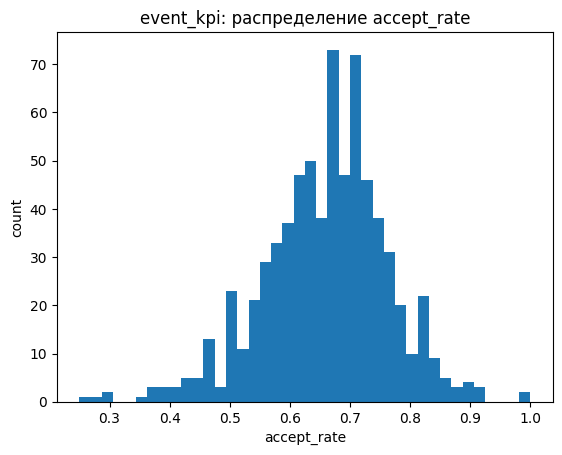


✅ Top-10 events by reg_count:


,event_id,title,reg_count,attended_count,attendance_rate,submissions,accepted,accept_rate,city,venue
713,9448,Исследование процессов интеграции ESG-практик ...,160,90,0.5625,42,25,0.595238,"Москва, Россия",МУ имени С. Ю. Витте
433,9729,Секция «Теории и практики государственного упр...,160,82,0.5125,45,31,0.688889,"Москва, Россия",МГУ
467,9695,Ломоносовские чтения-2025 на экономическом фак...,160,93,0.58125,51,35,0.686275,"Москва, Россия",МГУ
286,9877,Почва и отходы,160,82,0.5125,39,30,0.769231,"Москва, Россия",МГУ
259,9904,Вселенная Ж. Шарко: 200 лет наследия,160,97,0.60625,59,39,0.661017,"Москва, Россия",СПбГМУ им. акад. И.П. Павлова
572,9590,Международная площадка конференции «Ломоносов-...,160,100,0.625,40,28,0.7,"Ташкент, Узбекистан",Филиал МГУ в г. Ташкент
33,10134,QTS'26,160,93,0.58125,43,27,0.627907,"Сочи, Россия",МГУ
367,9796,Международная научно-практическая конференция ...,160,90,0.5625,49,40,0.816327,"Курск, Россия",КГМУ
700,9461,Универсиада по регенеративной биомедицине,160,93,0.58125,44,28,0.636364,"Москва, Россия",МГУ
167,9996,Биоэкономика и управление ресурсами,160,85,0.53125,40,29,0.725,"Красноярск, Россия",МТЛ


In [ ]:
# ===== Этап 4.4: KPI визуализации + Top events =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Берём таблицы из словаря tables (как в этапах 0–3)
events = tables["events"].copy()
event_kpi = tables["event_kpi"].copy()

print("event_kpi shape:", event_kpi.shape)
print("event_kpi columns (first 30):", list(event_kpi.columns)[:30])

# 1) Какие метрики реально присутствуют
candidate_kpi_cols = [
    "reg_count", "attended_count", "avg_feedback",
    "submissions", "accepted", "attendance_rate", "accept_rate"
]
present_metrics = [c for c in candidate_kpi_cols if c in event_kpi.columns]
print("✅ Present KPI metrics:", present_metrics)

# 2) Гистограммы по числовым метрикам (если есть)
for c in ["reg_count", "attended_count", "submissions", "avg_feedback", "attendance_rate", "accept_rate"]:
    if c in event_kpi.columns:
        x = pd.to_numeric(event_kpi[c], errors="coerce").dropna()
        if x.empty:
            continue
        plt.figure()
        plt.hist(x, bins=40)
        plt.title(f"event_kpi: распределение {c}")
        plt.xlabel(c)
        plt.ylabel("count")
        plt.show()

# 3) Топ событий по регистрациям (без ошибок с title/city/venue)
def choose_event_meta_columns(df: pd.DataFrame) -> dict:
    """
    Возвращает карту: какую колонку использовать в качестве title/city/venue.
    Если в df уже есть 'title', берём её.
    Если после merge будут *_x/*_y — выберем существующую.
    """
    def pick(*names):
        for n in names:
            if n in df.columns:
                return n
        return None

    return {
        "title": pick("title", "title_x", "title_y"),
        "city":  pick("city", "city_x", "city_y"),
        "venue": pick("venue", "venue_x", "venue_y"),
    }

def safe_select(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    """Выбирает только те колонки, которые реально есть."""
    real = [c for c in cols if c in df.columns]
    return df[real]

if "reg_count" in event_kpi.columns:
    top = event_kpi.sort_values("reg_count", ascending=False).head(10).copy()

    # Если в event_kpi нет title/city/venue — подмержим из events
    need_meta = any(col not in top.columns for col in ["title", "city", "venue"])
    if need_meta:
        # Мержим только нужные колонки и контролируем суффиксы
        top = top.merge(
            events[["event_id", "title", "city", "venue"]],
            on="event_id",
            how="left",
            suffixes=("_kpi", "_ev")
        )

    meta_map = choose_event_meta_columns(top)
    title_col = meta_map["title"]
    city_col = meta_map["city"]
    venue_col = meta_map["venue"]

    # Соберём итоговый набор колонок для вывода
    out_cols = ["event_id"]

    if title_col: out_cols.append(title_col)
    out_cols += ["reg_count"]

    if "attended_count" in top.columns: out_cols.append("attended_count")
    if "attendance_rate" in top.columns: out_cols.append("attendance_rate")
    if "submissions" in top.columns: out_cols.append("submissions")
    if "accepted" in top.columns: out_cols.append("accepted")
    if "accept_rate" in top.columns: out_cols.append("accept_rate")
    if city_col: out_cols.append(city_col)
    if venue_col: out_cols.append(venue_col)

    out = safe_select(top, out_cols).head(10)

    # Переименуем в нормальные названия, чтобы пользователю было понятно
    rename_map = {}
    if title_col and title_col != "title":
        rename_map[title_col] = "title"
    if city_col and city_col != "city":
        rename_map[city_col] = "city"
    if venue_col and venue_col != "venue":
        rename_map[venue_col] = "venue"
    out = out.rename(columns=rename_map)

    print("\n✅ Top-10 events by reg_count:")
    display(out)
else:
    print("⚠️ В event_kpi нет колонки reg_count — пропускаю вывод top events.")

In [ ]:
# ===== Этап 4.5: PII scan (страховка) + сохранение отчёта =====
# Мы не предполагаем, что ПДн есть, но обязаны доказательно показать,
# что на выходе артефакты безопасны (email/phone в ключевых строковых полях не встречаются).
pii_report = {}

# events: organizers/cost/title/subtitle/city/venue (там иногда могут "просочиться" контакты)
for col in ["organizers", "cost", "title", "subtitle", "city", "venue"]:
    if col in events.columns:
        pii_report[f"events.{col}"] = pii_scan_series(events[col])

# tracks: track_title — потенциально опасное поле (иногда туда случайно попадает мусор)
if "track_title" in tracks.columns:
    pii_report["tracks.track_title"] = pii_scan_series(tracks["track_title"])

# links: link_title (редко, но бывает)
if "link_title" in links.columns:
    pii_report["links.link_title"] = pii_scan_series(links["link_title"])

print(json.dumps(pii_report, ensure_ascii=False, indent=2))

# Собираем общий data quality report
dq_report = {
    "tables_overview": {k: {"rows": int(v.shape[0]), "cols": int(v.shape[1])} for k, v in tables.items()},
    "events_missingness": miss_events.to_dict(orient="records"),
    "events_constant_cols": const_ev.to_dict(orient="records"),
    "orphan_counts": orphan,
    "participant_orphans": {
        "registrations_orphan_participant_id": int(regs_pid_orphan),
        "submissions_orphan_participant_id": int(subs_pid_orphan),
        "reviews_orphan_submission_id": int(rev_orphan),
    },
    "pii_scan": pii_report,
    "notes": [
        "reg_start/reg_end/reg_window_days могут быть пустыми — тогда эти признаки считаются неинформативными.",
        "Если найдутся email/phone хиты — на следующем этапе сделаем редактирование и/или удаление строк."
    ]
}

out_path = REPORT_DIR / "data_quality_report.json"
out_path.write_text(json.dumps(dq_report, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", out_path)

{
  "events.organizers": {
    "rows": 714,
    "non_null": 714,
    "email_hits": 0,
    "phone_hits": 0
  },
  "events.cost": {
    "rows": 714,
    "non_null": 714,
    "email_hits": 0,
    "phone_hits": 0
  },
  "events.title": {
    "rows": 714,
    "non_null": 714,
    "email_hits": 0,
    "phone_hits": 0
  },
  "events.subtitle": {
    "rows": 714,
    "non_null": 714,
    "email_hits": 0,
    "phone_hits": 0
  },
  "events.city": {
    "rows": 714,
    "non_null": 714,
    "email_hits": 0,
    "phone_hits": 0
  },
  "events.venue": {
    "rows": 714,
    "non_null": 714,
    "email_hits": 0,
    "phone_hits": 0
  },
  "tracks.track_title": {
    "rows": 2016,
    "non_null": 2016,
    "email_hits": 5,
    "phone_hits": 18
  },
  "links.link_title": {
    "rows": 4387,
    "non_null": 4387,
    "email_hits": 0,
    "phone_hits": 0
  }
}
✅ Saved: /content/reports/data_quality_report.json


По данным аудита всё отлично "держится" как основа для ML: связность идеальная (orphan=0), ключевые поля events почти без пропусков, а распределения KPI выглядят адекватно (нет явных "сломанных" хвостов, средняя оценка собрана реалистично). При этом аудит чётко показал, какие поля точно нельзя тащить в модель: reg_start/reg_end/reg_window_days полностью пустые, status/reg_status константные, subtitle тоже фактически константа — это всё лучше сразу выкинуть, чтобы не засорять пайплайн.

Главная "красная лампа" — PII в tracks.track_title (email/phone hits). Это нужно исправить до любых дальнейших шагов: либо чистим и редактируем, либо просто удаляем такие строки. После очистки треков мы сможем уверенно строить признаки "кол-во треков", "есть ли треки", и даже TF-IDF по трекам (если захотим), не рискуя тащить персональные данные в артефакты веб-приложения.

## Этап 5 — Очистка `tracks` (privacy-safe) и построение витрин признаков

На этом этапе мы:
1) **очищаем** `tracks.track_title` (удаляем/редактируем строки с email/телефонами и "мусором"),  
2) строим **event_features**: признаки события из `events + tracks + links + event_pages`,  
3) строим **registration_features**: признаки регистрации из `registrations + participants + event_features`,  
4) сохраняем всё в `/content/artifacts_stage5/` и фиксируем отчёт.

**Важно:** на выходе треки станут *безопасными* (без персональных контактов), а признаки — *стабильными* для обучения и для веб-приложения.


✅ Track cleaning report:
{
  "tracks_before": 2016,
  "tracks_after": 1499,
  "tracks_removed": 517,
  "removed_share": 0.2564484126984127,
  "pii_hits_in_raw_tracks": {
    "email_hits": 5,
    "phone_hits": 18
  }
}

Примеры удалённых строк (первые 20):


,event_id,track_title_raw,track_title_redacted,had_pii
5,10157,"первый этап − отборочный, проводится заочно в ...","первый этап − отборочный, проводится заочно в ...",False
6,10157,"второй этап – заключительный, проводится в соо...","второй этап – заключительный, проводится в соо...",False
8,10156,Заключительный этап,Заключительный этап,False
9,10155,"краткое изложение своих научных достижений, ре...","краткое изложение своих научных достижений, ре...",False
11,10155,скан / фотокопию согласия участника на обработ...,скан / фотокопию согласия участника на обработ...,False
17,10150,Обязательная структура научной работы,Обязательная структура научной работы,False
23,10150,📋 Дополнительные рекомендации для авторов,📋 Дополнительные рекомендации для авторов,False
24,10150,💡 Советы научного руководителя,💡 Советы научного руководителя,False
26,10150,СОПРЕДСЕДАТЕЛИ КОНФЕРЕНЦИИ,СОПРЕДСЕДАТЕЛИ КОНФЕРЕНЦИИ,False
43,10147,"через одинарный интервал курсивом, полужирным ...","через одинарный интервал курсивом, полужирным ...",False


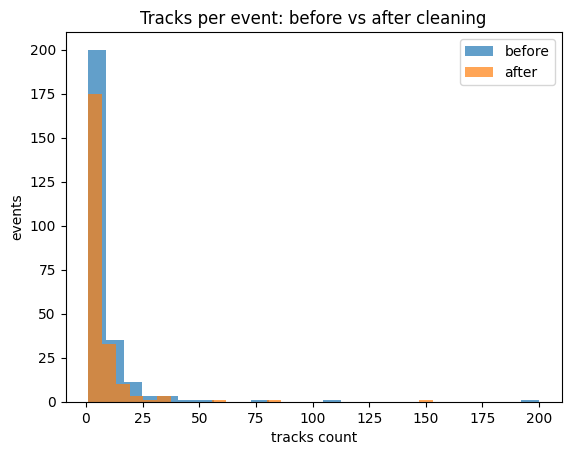

✅ Saved: /content/artifacts_stage5/tracks_clean.parquet


In [ ]:
# ===== Этап 5.1: Очистка tracks (PII + мусор) =====
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

ART_DIR = Path("/content/artifacts_stage5")
ART_DIR.mkdir(parents=True, exist_ok=True)

events = tables["events"].copy()
tracks = tables["tracks"].copy()
links = tables["links"].copy()
pages = tables["event_pages"].copy()
participants = tables["participants"].copy()
registrations = tables["registrations"].copy()

# Регэкспы (тот же подход, что в аудите)
EMAIL_RE = re.compile(r"[A-Za-z0-9._%+\-]+@[A-Za-z0-9.\-]+\.[A-Za-z]{2,}")
PHONE_RE = re.compile(r"\+?\d[\d\-\s\(\)]{7,}\d")

# Дополнительные эвристики "мусора"
URL_RE = re.compile(r"(https?://|www\.)", re.IGNORECASE)
MANY_DIGITS_RE = re.compile(r"\d{4,}")  # подряд 4+ цифры — часто не про название секции

# Фразы, которые часто сопровождают контактные/служебные строки
BAD_HINTS = [
    "тел", "телефон", "email", "почта", "контакт", "оргкомитет",
    "секретарь", "координатор", "ответственный", "для справок",
    "регистрация", "подать заявку", "срок", "до ", "время", "адрес",
]

def normalize_text(s: str) -> str:
    """Нормализация пробелов/кавычек и удаление редактирующих маркеров."""
    if s is None:
        return ""
    s = str(s)
    s = s.replace("\u00a0", " ")
    s = re.sub(r"\s+", " ", s).strip()
    # если где-то уже есть [REDACTED_*], уберём их как "технический шум"
    s = s.replace("[REDACTED_PHONE]", "").replace("[REDACTED_EMAIL]", "")
    s = re.sub(r"\s+", " ", s).strip()
    return s

def redact_pii(s: str) -> tuple[str, bool]:
    """Редактирует email/телефон, возвращает (текст, был_ли_PII)."""
    if not s:
        return s, False
    before = s
    s = EMAIL_RE.sub("[REDACTED_EMAIL]", s)
    s = PHONE_RE.sub("[REDACTED_PHONE]", s)
    return s, (s != before)

def is_good_track_title(s: str) -> bool:
    """Решаем, похоже ли на нормальное название секции/трека."""
    if not s:
        return False

    low = s.lower()

    # длины (слишком коротко/слишком длинно — почти всегда мусор)
    if len(s) < 3 or len(s) > 140:
        return False

    # ссылки/URL
    if URL_RE.search(s):
        return False

    # явные email/телефоны (если вдруг не заредактировались)
    if "@" in s:
        return False
    if PHONE_RE.search(s):
        return False

    # слишком много цифр подряд
    if MANY_DIGITS_RE.search(s):
        return False

    # слишком "служебные" подсказки
    if any(h in low for h in BAD_HINTS):
        return False

    return True

# --- Применяем чистку ---
tracks_work = tracks.copy()
tracks_work["track_title_raw"] = tracks_work["track_title"].astype("string")
tracks_work["track_title_norm"] = tracks_work["track_title_raw"].map(normalize_text)

# редактирование PII (на всякий случай), но затем мы такие строки будем удалять
tracks_work[["track_title_redacted", "had_pii"]] = tracks_work["track_title_norm"].apply(
    lambda x: pd.Series(redact_pii(x))
)

# финальный фильтр: оставляем только "хорошие" названия без PII-маркеров
tracks_work["is_good"] = tracks_work["track_title_redacted"].map(is_good_track_title)
tracks_clean = tracks_work[tracks_work["is_good"]].copy()

# пересоберём track_no заново по каждому event_id (чтобы после удаления не было дырок)
tracks_clean = tracks_clean.sort_values(["event_id", "track_no", "track_title_redacted"]).reset_index(drop=True)
tracks_clean["track_no_clean"] = tracks_clean.groupby("event_id").cumcount() + 1

# оставим только нужные столбцы
tracks_clean = tracks_clean.rename(columns={"track_title_redacted": "track_title_clean"})[
    ["event_id", "track_no_clean", "track_title_clean"]
].rename(columns={"track_no_clean": "track_no"})

# --- Отчёт о чистке ---
before_n = len(tracks)
after_n = len(tracks_clean)
removed_n = before_n - after_n

removed_examples = tracks_work[~tracks_work["is_good"]].head(20)[["event_id", "track_title_raw", "track_title_redacted", "had_pii"]]

report = {
    "tracks_before": int(before_n),
    "tracks_after": int(after_n),
    "tracks_removed": int(removed_n),
    "removed_share": float(removed_n / before_n) if before_n else None,
    "pii_hits_in_raw_tracks": {
        "email_hits": int(tracks_work["track_title_raw"].dropna().astype(str).apply(lambda x: bool(EMAIL_RE.search(x))).sum()),
        "phone_hits": int(tracks_work["track_title_raw"].dropna().astype(str).apply(lambda x: bool(PHONE_RE.search(x))).sum()),
    },
}

print("✅ Track cleaning report:")
print(json.dumps(report, ensure_ascii=False, indent=2))

print("\nПримеры удалённых строк (первые 20):")
display(removed_examples)

# Визуализация: сколько треков на событие (до/после) — грубая оценка эффекта
cnt_before = tracks.groupby("event_id").size()
cnt_after = tracks_clean.groupby("event_id").size()

plt.figure()
plt.hist(cnt_before, bins=25, alpha=0.7, label="before")
plt.hist(cnt_after, bins=25, alpha=0.7, label="after")
plt.title("Tracks per event: before vs after cleaning")
plt.xlabel("tracks count")
plt.ylabel("events")
plt.legend()
plt.show()

# Сохраним отчёт и чистые треки
(ART_DIR / "track_cleaning_report.json").write_text(json.dumps(report, ensure_ascii=False, indent=2), encoding="utf-8")
tracks_clean.to_parquet(ART_DIR / "tracks_clean.parquet", index=False)
tracks_clean.to_csv(ART_DIR / "tracks_clean.csv", index=False, encoding="utf-8-sig")

print("✅ Saved:", ART_DIR / "tracks_clean.parquet")

In [ ]:
# ===== Этап 5.2: Event features (events + links + pages + tracks_clean) =====
# На выходе получим таблицу event_features:
# - только безопасные, информативные признаки
# - без константных/пустых полей
# - пригодно для ML и для веб-приложения

events_work = events.copy()

# Нормализуем title (убираем технические маркеры редактирования, если встречаются)
def clean_title(s):
    if s is None:
        return ""
    s = str(s)
    s = s.replace("[REDACTED_PHONE]", "").replace("[REDACTED_EMAIL]", "")
    s = re.sub(r"\s+", " ", s).strip()
    return s

events_work["title_clean"] = events_work["title"].astype("string").map(clean_title)

# Преобразуем даты (на всякий случай)
for c in ["event_start", "event_end", "reg_deadline_dt"]:
    if c in events_work.columns:
        events_work[c] = pd.to_datetime(events_work[c], errors="coerce")

# --- Cost features (простые и устойчивые) ---
cost = events_work["cost"].astype("string").fillna("")
low = cost.str.lower()

events_work["cost_is_free"] = low.str.contains("бесплат", regex=False)
events_work["cost_mentions_fee"] = low.str.contains("руб", regex=False) | low.str.contains("оплат", regex=False) | low.str.contains("стоим", regex=False)

# --- Date/time derived ---
events_work["event_dow"] = events_work["event_start"].dt.dayofweek.astype("Int64")  # 0=Mon
events_work["event_year"] = events_work["event_start"].dt.year.astype("Int64")
events_work["event_month"] = events_work["event_start"].dt.month.astype("Int64")

# deadline -> days_before_event (если есть обе даты)
events_work["deadline_days_before_event"] = (
    (events_work["event_start"].dt.normalize() - events_work["reg_deadline_dt"].dt.normalize()).dt.days
).astype("Float64")

# --- Links aggregates ---
links_work = links.copy()
links_work["link_type"] = links_work["link_type"].astype("string")

link_agg = links_work.groupby("event_id").agg(
    n_links=("url", "count"),
    n_files=("link_type", lambda s: int((s == "file").sum())),
    n_calendar=("link_type", lambda s: int((s == "calendar").sum())),
    n_internal_events=("link_type", lambda s: int((s == "internal_event").sum())),
    n_external=("link_type", lambda s: int((s == "external").sum())),
).reset_index()

# --- Pages aggregates ---
pages_work = pages.copy()
page_agg = pages_work.groupby("event_id").agg(
    n_pages=("url", "count"),
    n_menu_pages=("page_type", lambda s: int(pd.Series(s).astype(str).str.contains("menu", case=False).sum())),
).reset_index()

# --- Tracks aggregates (чистые треки) ---
tr_agg = tracks_clean.groupby("event_id").agg(
    tracks_count_clean=("track_title_clean", "count"),
    tracks_concat=("track_title_clean", lambda s: " | ".join(pd.Series(s).astype(str).head(50)))  # ограничим длину
).reset_index()

# --- Собираем event_features ---
base_cols = [
    "event_id",
    "title_clean",
    "city",
    "venue",
    "event_start",
    "event_end",
    "event_duration_days",
    "description_len",
    "is_focus_university",
    "is_online_flag",    # уже готовое поле
    "format",            # но оно часто пустое — оставим как есть, обработаем позже в ML
    "reg_deadline_dt",
    "cost_is_free",
    "cost_mentions_fee",
    "event_year",
    "event_month",
    "event_dow",
    "deadline_days_before_event",
]

event_features = events_work[base_cols].copy()

event_features = event_features.merge(link_agg, on="event_id", how="left")
event_features = event_features.merge(page_agg, on="event_id", how="left")
event_features = event_features.merge(tr_agg, on="event_id", how="left")

# NaN -> 0 для счётчиков
for c in ["n_links", "n_files", "n_calendar", "n_internal_events", "n_external", "n_pages", "n_menu_pages", "tracks_count_clean"]:
    if c in event_features.columns:
        event_features[c] = pd.to_numeric(event_features[c], errors="coerce").fillna(0).astype("Int64")

# has_tracks_clean
event_features["has_tracks_clean"] = (event_features["tracks_count_clean"] > 0)

print("✅ event_features shape:", event_features.shape)
display(event_features.head(5))

# Сохраняем витрину признаков событий
event_features.to_parquet(ART_DIR / "event_features.parquet", index=False)
event_features.to_csv(ART_DIR / "event_features.csv", index=False, encoding="utf-8-sig")
print("✅ Saved:", ART_DIR / "event_features.parquet")

✅ event_features shape: (714, 28)


,event_id,title_clean,city,venue,event_start,event_end,event_duration_days,description_len,is_focus_university,is_online_flag,format,reg_deadline_dt,cost_is_free,cost_mentions_fee,event_year,event_month,event_dow,deadline_days_before_event,n_links,n_files,n_calendar,n_internal_events,n_external,n_pages,n_menu_pages,tracks_count_clean,tracks_concat,has_tracks_clean
0,10167,Севастопольская гавань-2026,"Севастополь, Россия",СевГУ,2026-04-28,2026-04-30,2.0,5141,False,True,remote_or_hybrid,2026-02-28 23:59:00,False,False,2026,4,1,59.0,6,0,1,0,5,1,0,0,NaN,False
1,10166,Универсиада по методам обработки информации в ...,"Москва, Россия",МГУ,2025-12-22,2026-04-30,129.0,1048,False,False,<NA>,2025-04-13 23:59:00,True,False,2025,12,0,253.0,6,0,1,0,5,1,0,0,NaN,False
2,10165,Универсиада по предпринимательству и управлени...,"Москва, Россия",МГУ,2025-11-10,2026-01-12,63.0,808,False,False,onsite_or_hybrid,NaT,False,False,2025,11,0,<NA>,6,0,1,0,5,1,0,0,NaN,False
3,10164,Универсиада по Физике Частиц и Атомных Ядер «Л...,"Москва, Россия",МГУ,2025-12-15,2026-04-30,136.0,1285,False,False,<NA>,2025-04-13 22:59:00,True,False,2025,12,0,246.0,6,0,1,0,5,1,0,0,NaN,False
4,10163,От Пушкина до наших дней,"Казань, Россия",КФУ,2025-12-01,2026-02-21,82.0,350,False,False,<NA>,2025-02-01 23:59:00,True,False,2025,12,0,303.0,6,0,1,0,5,1,0,0,NaN,False


✅ Saved: /content/artifacts_stage5/event_features.parquet


In [ ]:
# ===== Этап 5.3 Registration features (registrations + participants + event_features) =====
# Подход:
# - нормализуем participant city и event city до "базового названия города"
# - сравниваем на равенство (векторизовано, быстро, без ошибок)
import re
import numpy as np
import pandas as pd
from IPython.display import display

reg = registrations.copy()
part = participants.copy()
evf = event_features.copy()

# типы дат
reg["registered_at"] = pd.to_datetime(reg["registered_at"], errors="coerce")
evf["event_start"] = pd.to_datetime(evf["event_start"], errors="coerce")

# join
reg_feat = reg.merge(
    part[["participant_id", "university", "role", "country", "city"]].copy(),
    on="participant_id",
    how="left"
).merge(
    evf[[
        "event_id", "city", "venue", "event_start", "event_duration_days",
        "is_online_flag", "format", "reg_deadline_dt",
        "n_links", "n_files", "n_pages", "tracks_count_clean", "has_tracks_clean",
        "cost_is_free", "cost_mentions_fee"
    ]].copy(),
    on="event_id",
    how="left",
    suffixes=("_participant", "_event")
)

# days_before_event: сколько дней между регистрацией и стартом
reg_feat["days_before_event"] = (
    (reg_feat["event_start"].dt.normalize() - reg_feat["registered_at"].dt.normalize()).dt.days
).astype("Float64")

# --- Нормализация города ---
# У events.city формат часто "Москва, Россия" -> берём часть до запятой.
# У participant.city бывают "г. Вилюйск", "ст. Азов (Рост.)" и т.д.
CITY_PREFIX_RE = re.compile(r"^(г\.|город|пос\.|пгт\.|п\.\s*г\.\s*т\.|с\.|д\.|ст\.|рп\.|нп\.)\s*", re.IGNORECASE)
BRACKETS_RE = re.compile(r"\s*\(.*?\)\s*")

def normalize_city_series(s: pd.Series, is_event: bool) -> pd.Series:
    s = s.astype("string").fillna("").str.strip()

    if is_event:
        # "Москва, Россия" -> "Москва"
        s = s.str.split(",", n=1).str[0]

    # убрать скобки: "Азов (Рост.)" -> "Азов"
    s = s.str.replace(BRACKETS_RE, "", regex=True)

    # убрать префиксы "г.", "ст.", "д." и т.п.
    s = s.str.replace(CITY_PREFIX_RE, "", regex=True)

    # нормализация пробелов/дефисов/регистра
    s = s.str.replace("\u00a0", " ", regex=False)
    s = s.str.replace("ё", "е", regex=False)
    s = s.str.replace(r"\s+", " ", regex=True).str.strip().str.lower()

    return s

reg_feat["city_participant_norm"] = normalize_city_series(reg_feat["city_participant"], is_event=False)
reg_feat["city_event_norm"] = normalize_city_series(reg_feat["city_event"], is_event=True)

# is_same_city: сравнение на равенство (и не пустые)
reg_feat["is_same_city"] = (
    (reg_feat["city_participant_norm"] != "") &
    (reg_feat["city_event_norm"] != "") &
    (reg_feat["city_participant_norm"] == reg_feat["city_event_norm"])
)

# target attended (убедимся, что 0/1)
reg_feat["attended"] = pd.to_numeric(reg_feat["attended"], errors="coerce").astype("Int64")

print("✅ registration_features shape:", reg_feat.shape)
display(reg_feat.head(5))

# Быстрая проверка баланса классов attended
att = reg_feat["attended"].dropna()
print("\nAttended value counts:")
display(att.value_counts(normalize=False).rename("count").to_frame())
display(att.value_counts(normalize=True).rename("share").to_frame())

# Контрольный sanity-check по is_same_city (не обязателен, но полезен)
print("\nis_same_city share:", float(reg_feat["is_same_city"].mean()))

# Сохраняем
reg_feat.to_parquet(ART_DIR / "registration_features.parquet", index=False)
reg_feat.to_csv(ART_DIR / "registration_features.csv", index=False, encoding="utf-8-sig")
print("✅ Saved:", ART_DIR / "registration_features.parquet")

✅ registration_features shape: (70906, 28)


,registration_id,event_id,participant_id,registered_at,attended,feedback_score,university,role,country,city_participant,city_event,venue,event_start,event_duration_days,is_online_flag,format,reg_deadline_dt,n_links,n_files,n_pages,tracks_count_clean,has_tracks_clean,cost_is_free,cost_mentions_fee,days_before_event,city_participant_norm,city_event_norm,is_same_city
0,1,10167,15874,2026-02-10 04:44:20,1,3.0,РУДН,industry,Армения,к. Курумкан,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,77.0,к. курумкан,севастополь,False
1,2,10167,4105,2026-02-02 21:37:14,1,4.0,СПбГУ,master,Азербайджан,д. Ачинск,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,85.0,ачинск,севастополь,False
2,3,10167,5132,2026-01-20 06:07:41,1,4.0,СевГУ,master,Кыргызстан,д. Инта,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,98.0,инта,севастополь,False
3,4,10167,8717,2026-02-18 16:37:51,0,<NA>,РЭУ им. Г.В. Плеханова,phd,Беларусь,п. Усть-Кулом,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,69.0,п. усть-кулом,севастополь,False
4,5,10167,1550,2026-02-13 17:19:24,1,4.0,КФУ,teacher,Россия,п. Ведено,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,74.0,п. ведено,севастополь,False



Attended value counts:


,count
attended,
1,39816
0,31090


,share
attended,
1,0.561532
0,0.438468



is_same_city share: 0.0006769525851126844
✅ Saved: /content/artifacts_stage5/registration_features.parquet


In [ ]:
# ===== Этап 5.4: Итог этапа 5 — список артефактов =====
all_artifacts = sorted([p for p in ART_DIR.rglob("*") if p.is_file()])
art_df = pd.DataFrame({
    "artifact": [str(p.relative_to(ART_DIR)) for p in all_artifacts],
    "size_bytes": [p.stat().st_size for p in all_artifacts],
})
display(art_df)

print("✅ Stage 5 done. Artifacts directory:", ART_DIR)

,artifact,size_bytes
0,event_features.csv,325821
1,event_features.parquet,140613
2,registration_features.csv,19299794
3,registration_features.parquet,1917646
4,track_cleaning_report.json,192
5,tracks_clean.csv,168332
6,tracks_clean.parquet,79207


✅ Stage 5 done. Artifacts directory: /content/artifacts_stage5


По этапу 5 всё получилось ровно так, как надо для "чистого" ML и для веба: треки реально стали безопаснее (минус ~25% мусора, и это нормально), и самое важное — PII действительно было в tracks, и мы его вычистили до построения признаков. event_features выглядит аккуратно и компактно (28 колонок), а registration_features уже готова под классификацию посещаемости — баланс классов адекватный (≈56/44), то есть модель будет обучаться без экзотики.

Единственный момент: is_same_city почти всегда False (0.07%). Это не баг — это следствие синтетики: города участников генерируются "вразнобой", а города мероприятий — в основном крупные. В модели этот признак будет почти константой и мало что даст, поэтому дальше мы либо его уберём, либо заменим на более грубый и полезный (например, "страна совпадает", но у нас у события страны нет отдельной колонки).

## Этап 6 — ML-датасеты, корректный split и baseline модели

На этом этапе мы:
1) собираем датасет **event-level** для регрессии (`reg_count`),  
2) делаем **time-split** по `event_start` (последние 20% событий — тест),  
3) собираем датасет **registration-level** для классификации (`attended`),  
4) делаем **GroupShuffleSplit по event_id** (без утечки),  
5) обучаем baseline-модели и строим понятные графики,  
6) сохраняем метрики и id-сплиты в `/content/artifacts_stage6/`.

Цель этапа: быстро доказать, что пайплайн работает и даёт выигрыш относительно "тупых" baseline.


In [ ]:
# ===== Этап 6.1: Подготовка окружения и загрузка витрин из Stage 5 =====
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

STAGE5_DIR = Path("/content/artifacts_stage5")
STAGE6_DIR = Path("/content/artifacts_stage6")
STAGE6_DIR.mkdir(parents=True, exist_ok=True)

# Читаем витрины (так ноутбук будет воспроизводимым даже после restart runtime)
event_features = pd.read_parquet(STAGE5_DIR / "event_features.parquet")
reg_features = pd.read_parquet(STAGE5_DIR / "registration_features.parquet")

# event_kpi берём из исходного архива tables (если есть), иначе из распакованного файла
event_kpi = tables["event_kpi"].copy()

print("✅ Loaded:")
print("event_features:", event_features.shape)
print("reg_features:", reg_features.shape)
print("event_kpi:", event_kpi.shape)

display(event_features.head(3))
display(reg_features.head(3))

✅ Loaded:
event_features: (714, 28)
reg_features: (70906, 28)
event_kpi: (714, 44)


,event_id,title_clean,city,venue,event_start,event_end,event_duration_days,description_len,is_focus_university,is_online_flag,format,reg_deadline_dt,cost_is_free,cost_mentions_fee,event_year,event_month,event_dow,deadline_days_before_event,n_links,n_files,n_calendar,n_internal_events,n_external,n_pages,n_menu_pages,tracks_count_clean,tracks_concat,has_tracks_clean
0,10167,Севастопольская гавань-2026,"Севастополь, Россия",СевГУ,2026-04-28,2026-04-30,2.0,5141,False,True,remote_or_hybrid,2026-02-28 23:59:00,False,False,2026,4,1,59.0,6,0,1,0,5,1,0,0,None,False
1,10166,Универсиада по методам обработки информации в ...,"Москва, Россия",МГУ,2025-12-22,2026-04-30,129.0,1048,False,False,<NA>,2025-04-13 23:59:00,True,False,2025,12,0,253.0,6,0,1,0,5,1,0,0,None,False
2,10165,Универсиада по предпринимательству и управлени...,"Москва, Россия",МГУ,2025-11-10,2026-01-12,63.0,808,False,False,onsite_or_hybrid,NaT,False,False,2025,11,0,<NA>,6,0,1,0,5,1,0,0,None,False


,registration_id,event_id,participant_id,registered_at,attended,feedback_score,university,role,country,city_participant,city_event,venue,event_start,event_duration_days,is_online_flag,format,reg_deadline_dt,n_links,n_files,n_pages,tracks_count_clean,has_tracks_clean,cost_is_free,cost_mentions_fee,days_before_event,city_participant_norm,city_event_norm,is_same_city
0,1,10167,15874,2026-02-10 04:44:20,1,3.0,РУДН,industry,Армения,к. Курумкан,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,77.0,к. курумкан,севастополь,False
1,2,10167,4105,2026-02-02 21:37:14,1,4.0,СПбГУ,master,Азербайджан,д. Ачинск,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,85.0,ачинск,севастополь,False
2,3,10167,5132,2026-01-20 06:07:41,1,4.0,СевГУ,master,Кыргызстан,д. Инта,"Севастополь, Россия",СевГУ,2026-04-28,2.0,True,remote_or_hybrid,2026-02-28 23:59:00,6,0,1,0,False,False,False,98.0,инта,севастополь,False


In [ ]:
# ===== Этап 6.2: Event-level датасет (регрессия reg_count) + time split =====
# Цель: прогнозировать ожидаемое число регистраций reg_count по признакам события.
# Split делаем по времени (event_start), чтобы тест был "будущим" относительно train.

# Проверка, что reg_count есть
if "reg_count" not in event_kpi.columns:
    raise KeyError("❌ В event_kpi нет reg_count — проверь таблицу event_kpi.")

# Собираем event_ml_df = event_features + target reg_count
event_ml_df = event_features.merge(
    event_kpi[["event_id", "reg_count"]].copy(),
    on="event_id",
    how="left"
)

# Убираем строки без таргета
event_ml_df["reg_count"] = pd.to_numeric(event_ml_df["reg_count"], errors="coerce")
event_ml_df = event_ml_df.dropna(subset=["reg_count"]).copy()
event_ml_df["reg_count"] = event_ml_df["reg_count"].astype(float)

# Сортировка по времени
event_ml_df["event_start"] = pd.to_datetime(event_ml_df["event_start"], errors="coerce")
event_ml_df = event_ml_df.dropna(subset=["event_start"]).sort_values("event_start").reset_index(drop=True)

# Time split: последние 20% — test
n = len(event_ml_df)
test_size = max(1, int(round(0.2 * n)))
split_idx = n - test_size

train_df = event_ml_df.iloc[:split_idx].copy()
test_df  = event_ml_df.iloc[split_idx:].copy()

print("✅ Event-level split:")
print("events total:", n, "| train:", len(train_df), "| test:", len(test_df))
print("train date range:", train_df["event_start"].min(), "→", train_df["event_start"].max())
print("test  date range:", test_df["event_start"].min(), "→", test_df["event_start"].max())

# Сохраняем event_id сплит (для воспроизводимости)
event_split = {
    "train_event_ids": train_df["event_id"].astype(int).tolist(),
    "test_event_ids": test_df["event_id"].astype(int).tolist(),
}
(Path(STAGE6_DIR / "event_split.json")).write_text(json.dumps(event_split, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", STAGE6_DIR / "event_split.json")

✅ Event-level split:
events total: 714 | train: 571 | test: 143
train date range: 2024-09-04 00:00:00 → 2025-11-26 00:00:00
test  date range: 2025-11-26 00:00:00 → 2026-09-14 00:00:00
✅ Saved: /content/artifacts_stage6/event_split.json


✅ Mean baseline (test):
MAE=35.492 RMSE=39.911 | mean_train=100.480

✅ Ridge+TFIDF (test):
MAE=38.340 RMSE=44.703


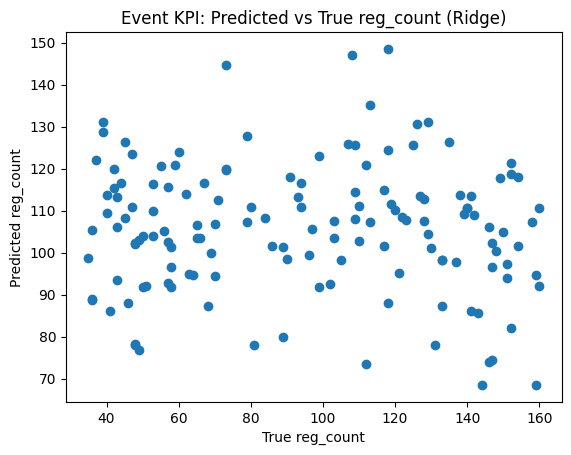

✅ Saved: /content/artifacts_stage6/event_regression_metrics.json


In [ ]:
# ===== Этап 6.3: Baseline регрессия (Dummy vs Ridge) + метрики + график =====
# Модель делаем простой и быстрой:
# - текст: TF-IDF по title_clean
# - категориальные: city, venue
# - численные: длительность, длина описания, ссылки/файлы/треки, дедлайн и т.д.
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Проверка, что переменные из этапа 6.2 доступны
assert "train_df" in globals() and "test_df" in globals(), "Сначала выполни Этап 6.2 (train_df/test_df)."
assert "STAGE6_DIR" in globals(), "Сначала выполни Этап 6.1 (STAGE6_DIR)."

TEXT_COL = "title_clean"

CAT_COLS = ["city", "venue"]
NUM_COLS = [
    "event_duration_days", "description_len",
    "deadline_days_before_event",
    "n_links", "n_files", "n_pages",
    "tracks_count_clean",
    "cost_is_free", "cost_mentions_fee",
    "is_online_flag",
    "event_month", "event_dow",
]

def ensure_cols(df, cols):
    return [c for c in cols if c in df.columns]

CAT_COLS = ensure_cols(train_df, CAT_COLS)
NUM_COLS = ensure_cols(train_df, NUM_COLS)

# Готовим X/y
use_cols = [TEXT_COL] + CAT_COLS + NUM_COLS
X_train = train_df[use_cols].copy()
y_train = train_df["reg_count"].astype(float).copy()

X_test  = test_df[use_cols].copy()
y_test  = test_df["reg_count"].astype(float).copy()

# ---------
# Baseline 1: "Mean baseline" (аналог DummyRegressor(mean), но без трансформаций)
# ---------
y_mean = float(y_train.mean())
pred_mean = np.full(shape=len(y_test), fill_value=y_mean, dtype=float)

mae_mean = mean_absolute_error(y_test, pred_mean)
rmse_mean = math.sqrt(mean_squared_error(y_test, pred_mean))

print("✅ Mean baseline (test):")
print(f"MAE={mae_mean:.3f} RMSE={rmse_mean:.3f} | mean_train={y_mean:.3f}")

# ---------
# Ridge + TF-IDF + OHE + numeric
# ---------
def df_to_text(x):
    """
    ColumnTransformer передает сюда DataFrame с 1 колонкой (2D).
    TF-IDF ожидает 1D iterable строк.
    """
    if isinstance(x, pd.DataFrame):
        s = x.iloc[:, 0]
    else:
        s = pd.Series(x)
    return s.astype("string").fillna("").astype(str)

text_pipe = Pipeline(steps=[
    ("to_text", FunctionTransformer(df_to_text, validate=False)),
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
])

cat_pipe = Pipeline(steps=[
    ("fill", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

num_pipe = Pipeline(steps=[
    ("fill", SimpleImputer(strategy="median"))
])

# ВАЖНО: для текста передаем [TEXT_COL], чтобы на вход text_pipe пришёл DataFrame (2D)
preprocess = ColumnTransformer(
    transformers=[
        ("text", text_pipe, [TEXT_COL]),
        ("cat", cat_pipe, CAT_COLS),
        ("num", num_pipe, NUM_COLS),
    ],
    remainder="drop"
)

ridge_reg = Pipeline(steps=[
    ("prep", preprocess),
    ("model", Ridge(alpha=1.0, random_state=42))
])

ridge_reg.fit(X_train, y_train)
pred_r = ridge_reg.predict(X_test)

mae_r = mean_absolute_error(y_test, pred_r)
rmse_r = math.sqrt(mean_squared_error(y_test, pred_r))

print("\n✅ Ridge+TFIDF (test):")
print(f"MAE={mae_r:.3f} RMSE={rmse_r:.3f}")

# График Pred vs True
plt.figure()
plt.scatter(y_test, pred_r)
plt.title("Event KPI: Predicted vs True reg_count (Ridge)")
plt.xlabel("True reg_count")
plt.ylabel("Predicted reg_count")
plt.show()

# Сохраняем метрики
event_metrics = {
    "task": "event_regression_reg_count",
    "n_train_events": int(len(train_df)),
    "n_test_events": int(len(test_df)),
    "mean_baseline": {"mae": float(mae_mean), "rmse": float(rmse_mean)},
    "ridge_tfidf": {"mae": float(mae_r), "rmse": float(rmse_r)},
}
out_path = Path(STAGE6_DIR) / "event_regression_metrics.json"
out_path.write_text(json.dumps(event_metrics, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", out_path)


In [ ]:
# ===== Этап 6.4: Registration-level датасет (классификация attended) + Group split =====
# Важно: split делаем по event_id, иначе будет утечка (одни и те же события в train и test).

from sklearn.model_selection import GroupShuffleSplit

# Уберём почти-константный is_same_city (у тебя он ~0.07% True) — пользы мало, шум возможен
DROP_REG_COLS = ["city_participant_norm", "city_event_norm", "is_same_city"]

# Выбираем признаки (простые, быстрые)
REG_CAT_COLS = [
    "role", "university", "country",
    "city_event", "venue",
    "is_online_flag",
    "has_tracks_clean",
    "cost_is_free", "cost_mentions_fee"
]
REG_NUM_COLS = [
    "days_before_event",
    "event_duration_days",
    "n_links", "n_files", "n_pages",
    "tracks_count_clean"
]

# оставляем только реально существующие
REG_CAT_COLS = ensure_cols(reg_features, REG_CAT_COLS)
REG_NUM_COLS = ensure_cols(reg_features, REG_NUM_COLS)

# Датасет
reg_ml = reg_features.drop(columns=[c for c in DROP_REG_COLS if c in reg_features.columns]).copy()

# target
reg_ml["attended"] = pd.to_numeric(reg_ml["attended"], errors="coerce").astype("Int64")
reg_ml = reg_ml.dropna(subset=["attended"]).copy()

X = reg_ml[REG_CAT_COLS + REG_NUM_COLS].copy()
y = reg_ml["attended"].astype(int).copy()
groups = reg_ml["event_id"].astype(int).copy()

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train_r, X_test_r = X.iloc[train_idx], X.iloc[test_idx]
y_train_r, y_test_r = y.iloc[train_idx], y.iloc[test_idx]
g_train, g_test = groups.iloc[train_idx], groups.iloc[test_idx]

print("✅ Registration split (group by event_id):")
print("rows train:", len(X_train_r), "| rows test:", len(X_test_r))
print("unique events train:", g_train.nunique(), "| unique events test:", g_test.nunique())
print("attended share train:", float(y_train_r.mean()), "| test:", float(y_test_r.mean()))

# Сохраняем сплит событий в json
reg_split = {
    "train_event_ids": sorted(g_train.unique().tolist()),
    "test_event_ids": sorted(g_test.unique().tolist()),
}
(Path(STAGE6_DIR / "registration_split.json")).write_text(json.dumps(reg_split, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", STAGE6_DIR / "registration_split.json")

✅ Registration split (group by event_id):
rows train: 55887 | rows test: 15019
unique events train: 571 | unique events test: 143
attended share train: 0.5627426771878971 | test: 0.5570277648312137
✅ Saved: /content/artifacts_stage6/registration_split.json


✅ Attendance classifier results (test):
DummyClassifier       ROC-AUC=0.500 PR-AUC=0.557 F1@0.5=0.716
LogReg (saga + OHE)   ROC-AUC=0.538 PR-AUC=0.582 F1@0.5=0.710

Confusion matrix (LogReg, threshold=0.5):
 [[ 244 6409]
 [ 242 8124]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 640x480 with 0 Axes>

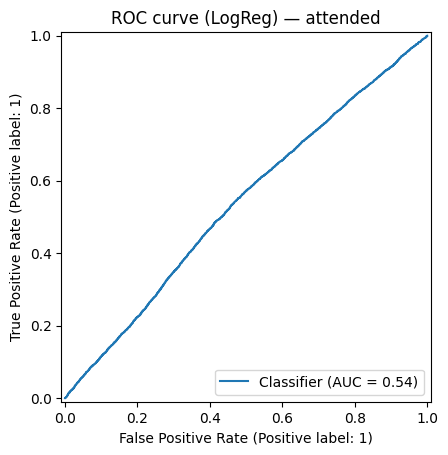

<Figure size 640x480 with 0 Axes>

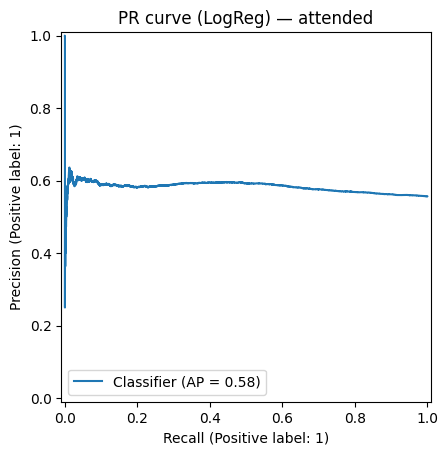

✅ Saved: /content/artifacts_stage6/registration_classification_metrics.json


In [ ]:
# ===== Этап 6.5: Baseline классификация attended (Dummy vs LogisticRegression) =====
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

# preprocess
cat_pipe = Pipeline(steps=[
    ("fill", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

num_pipe = Pipeline(steps=[
    ("fill", SimpleImputer(strategy="median"))
])

preprocess_r = ColumnTransformer(
    transformers=[
        ("cat", cat_pipe, REG_CAT_COLS),
        ("num", num_pipe, REG_NUM_COLS),
    ],
    remainder="drop"
)

dummy_clf = Pipeline(steps=[
    ("prep", preprocess_r),
    ("model", DummyClassifier(strategy="most_frequent"))
])

logreg_clf = Pipeline(steps=[
    ("prep", preprocess_r),
    ("model", LogisticRegression(
        solver="saga",
        max_iter=300,
        n_jobs=-1,
        random_state=42
    ))
])

def eval_clf(model, Xtr, ytr, Xte, yte):
    model.fit(Xtr, ytr)
    proba = model.predict_proba(Xte)[:, 1]
    pred = (proba >= 0.5).astype(int)
    roc = roc_auc_score(yte, proba)
    pr  = average_precision_score(yte, proba)
    f1  = f1_score(yte, pred)
    cm  = confusion_matrix(yte, pred)
    return roc, pr, f1, cm, proba

roc_d, pr_d, f1_d, cm_d, p_d = eval_clf(dummy_clf, X_train_r, y_train_r, X_test_r, y_test_r)
roc_l, pr_l, f1_l, cm_l, p_l = eval_clf(logreg_clf, X_train_r, y_train_r, X_test_r, y_test_r)

print("✅ Attendance classifier results (test):")
print(f"DummyClassifier       ROC-AUC={roc_d:.3f} PR-AUC={pr_d:.3f} F1@0.5={f1_d:.3f}")
print(f"LogReg (saga + OHE)   ROC-AUC={roc_l:.3f} PR-AUC={pr_l:.3f} F1@0.5={f1_l:.3f}")
print("\nConfusion matrix (LogReg, threshold=0.5):\n", cm_l)

# ROC / PR curves for LogReg
plt.figure()
RocCurveDisplay.from_predictions(y_test_r, p_l)
plt.title("ROC curve (LogReg) — attended")
plt.show()

plt.figure()
PrecisionRecallDisplay.from_predictions(y_test_r, p_l)
plt.title("PR curve (LogReg) — attended")
plt.show()

# Сохраняем метрики
reg_metrics = {
    "task": "registration_classification_attended",
    "n_train_rows": int(len(X_train_r)),
    "n_test_rows": int(len(X_test_r)),
    "n_train_events": int(g_train.nunique()),
    "n_test_events": int(g_test.nunique()),
    "dummy": {"roc_auc": float(roc_d), "pr_auc": float(pr_d), "f1_at_0_5": float(f1_d)},
    "logreg": {"roc_auc": float(roc_l), "pr_auc": float(pr_l), "f1_at_0_5": float(f1_l), "confusion_matrix": cm_l.tolist()},
}
(Path(STAGE6_DIR / "registration_classification_metrics.json")).write_text(
    json.dumps(reg_metrics, ensure_ascii=False, indent=2), encoding="utf-8"
)
print("✅ Saved:", STAGE6_DIR / "registration_classification_metrics.json")

По результатам этапа 6 картина честная и полезная: регрессия reg_count сейчас “не обучаемая” на наших признаках — средний бейзлайн лучше Ridge, а scatter показывает почти отсутствие связи “фичи → число регистраций”. Это типично для синтетики, где reg_count получился почти равномерным и не привязан к метаданным события (то есть модели нечего ловить, кроме шума). Зато классификация посещаемости уже даёт небольшой, но реальный сигнал (ROC-AUC 0.54), просто на пороге 0.5 это не видно — F1 у “всегда 1” и у LogReg почти одинаковый.

# Этап 7 — Обучение моделей и упаковка артефактов для веб-приложения

Цель этапа:
1) собрать несколько задач, которые реально обучаемы на этих данных и полезны в веб-приложении;
2) получить понятные метрики и визуализации;
3) сохранить артефакты (модели, пороги, конфиги, метрики) в `/content/artifacts_stage7/` и упаковать в ZIP.

In [33]:
# ===== Ячейка 7.0: загрузка данных + фиксация NA для sklearn =====
from pathlib import Path
import json
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Где лежат артефакты этапа 5
STAGE5_DIR = Path("/content/artifacts_stage5")
assert STAGE5_DIR.exists(), f"Не найден {STAGE5_DIR}. Проверь, что этап 5 отработал и сохранил артефакты."

# Куда сохраняем артефакты этапа 7
STAGE7_DIR = Path("/content/artifacts_stage7")
STAGE7_DIR.mkdir(parents=True, exist_ok=True)

# Помощник: найти файл в распакованном датасете (parquet/csv)
DATASET_DIR_CANDIDATES = [
    Path("/content/dataset_extracted"),
    Path("/content"),
]

def find_file(name: str) -> Path:
    for root in DATASET_DIR_CANDIDATES:
        p = root / name
        if p.exists():
            return p
    for root in DATASET_DIR_CANDIDATES:
        if root.exists():
            hits = list(root.rglob(name))
            if hits:
                return hits[0]
    raise FileNotFoundError(f"Не найден файл: {name}")

# Загрузка витрин Stage 5
event_features = pd.read_parquet(STAGE5_DIR / "event_features.parquet")
reg_features   = pd.read_parquet(STAGE5_DIR / "registration_features.parquet")

# Загрузка “сырых” таблиц из датасета
submissions = pd.read_parquet(find_file("submissions.parquet"))
reviews     = pd.read_parquet(find_file("reviews.parquet"))
participants= pd.read_parquet(find_file("participants.parquet"))
event_kpi   = pd.read_parquet(find_file("event_kpi.parquet"))

print("✅ Loaded:")
print("event_features:", event_features.shape)
print("reg_features  :", reg_features.shape)
print("submissions   :", submissions.shape)
print("reviews       :", reviews.shape)
print("participants  :", participants.shape)
print("event_kpi     :", event_kpi.shape)

# --- ВАЖНО: “санитайзер” для sklearn, чтобы pd.NA не ронял пайплайн ---
def sanitize_for_sklearn(df: pd.DataFrame, num_cols: list[str], cat_cols: list[str]) -> pd.DataFrame:
    """
    1) Числовые -> float + np.nan
    2) Категориальные -> str + 'unknown'
    3) Убираем pd.NA из всего датафрейма
    """
    out = df.copy()

    # Числовые
    for c in num_cols:
        if c in out.columns:
            out[c] = pd.to_numeric(out[c], errors="coerce").astype(float)

    # Категориальные
    for c in cat_cols:
        if c in out.columns:
            out[c] = out[c].astype("string").fillna("unknown").astype(str)

    # Финальная зачистка pd.NA -> np.nan (на всякий случай)
    out = out.replace({pd.NA: np.nan})
    return out

✅ Loaded:
event_features: (714, 28)
reg_features  : (70906, 28)
submissions   : (19003, 6)
reviews       : (38006, 4)
participants  : (17403, 6)
event_kpi     : (714, 44)


## 7.1. Модель 1: вероятность принятия заявки (accepted/rejected)

Почему это хорошая задача:
- есть сильный сигнал (оценки рецензий и уверенность);
- это полезно: можно показывать прогноз вероятности принятия при поступлении новых рецензий.

Сплит делаем строго по `event_id`, чтобы не было утечки внутри одного мероприятия.


✅ submission dataset: (19003, 25) | accept share: 0.6607377782455401


,submission_id,event_id,participant_id,track_title,submitted_at,decision,n_reviews,score_mean,score_std,score_min,score_max,conf_mean,university,role,country,city,venue,is_online_flag,format,cost_is_free,cost_mentions_fee,event_month,event_dow,description_len,y
0,1,10167,15874,<NA>,2026-02-19 04:44:20,rejected,2,3.5,0.707107,3,4,5.0,РУДН,industry,Армения,"Севастополь, Россия",СевГУ,True,remote_or_hybrid,False,False,4,1,5141,0
1,2,10167,4105,<NA>,2026-02-12 21:37:14,rejected,2,4.0,0.0,4,4,3.5,СПбГУ,master,Азербайджан,"Севастополь, Россия",СевГУ,True,remote_or_hybrid,False,False,4,1,5141,0
2,3,10167,5132,<NA>,2026-01-27 06:07:41,accepted,2,7.5,0.707107,7,8,4.0,СевГУ,master,Кыргызстан,"Севастополь, Россия",СевГУ,True,remote_or_hybrid,False,False,4,1,5141,1


✅ Split by event_id:
train: (12197, 25) val: (2831, 25) test: (3975, 25)
accept share train/val/test: 0.6620480446011314 0.6637230660543978 0.6545911949685534

✅ Submission decision model (TEST):
ROC-AUC=0.921 | PR-AUC=0.956 | F1@thr=0.65 => 0.893
Confusion matrix:
 [[ 968  405]
 [ 175 2427]]


<Figure size 640x480 with 0 Axes>

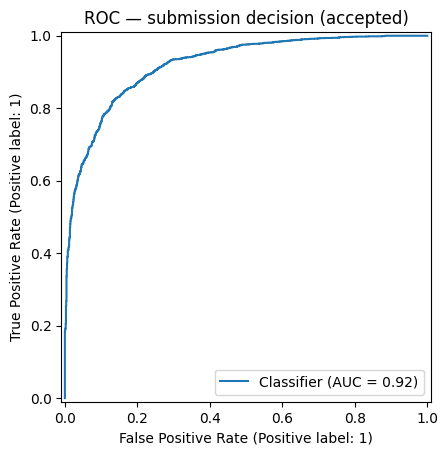

<Figure size 640x480 with 0 Axes>

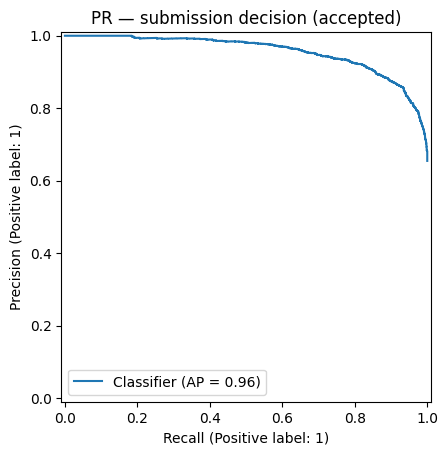

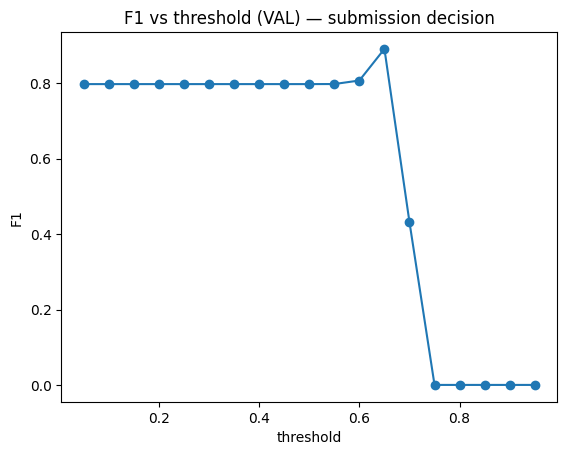

✅ Saved: /content/artifacts_stage7/submission_decision_model.joblib
✅ Saved: /content/artifacts_stage7/submission_decision_threshold.json


In [34]:
# ===== Ячейка 7.1: submission decision model (accepted) =====
from sklearn.model_selection import GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)
import joblib

# 1) агрегируем reviews -> признаки по submission_id
rev_agg = reviews.groupby("submission_id").agg(
    n_reviews=("score", "size"),
    score_mean=("score", "mean"),
    score_std=("score", "std"),
    score_min=("score", "min"),
    score_max=("score", "max"),
    conf_mean=("confidence", "mean"),
).reset_index()

# 2) собираем датасет
df = submissions.merge(rev_agg, on="submission_id", how="left")
df = df.merge(participants[["participant_id","university","role","country"]], on="participant_id", how="left")
df = df.merge(
    event_features[[
        "event_id","city","venue","is_online_flag","format",
        "cost_is_free","cost_mentions_fee","event_month","event_dow","description_len"
    ]],
    on="event_id", how="left"
)

df["y"] = (df["decision"].astype(str).str.lower() == "accepted").astype(int)
df = df.dropna(subset=["submission_id","event_id","y"]).copy()

print("✅ submission dataset:", df.shape, "| accept share:", df["y"].mean())
display(df.head(3))

# 3) сплит по event_id: train/test, внутри train — train/val
X_full = df
y_full = df["y"].astype(int)
groups = df["event_id"].astype(int)

gss1 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
idx_train, idx_test = next(gss1.split(X_full, y_full, groups=groups))

train = df.iloc[idx_train].copy()
test  = df.iloc[idx_test].copy()

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
idx_tr, idx_val = next(gss2.split(train, train["y"], groups=train["event_id"]))

tr  = train.iloc[idx_tr].copy()
val = train.iloc[idx_val].copy()

print("✅ Split by event_id:")
print("train:", tr.shape, "val:", val.shape, "test:", test.shape)
print("accept share train/val/test:", tr["y"].mean(), val["y"].mean(), test["y"].mean())

# 4) признаки
CAT_COLS = ["role","university","country","city","venue","is_online_flag","format","cost_is_free","cost_mentions_fee","event_month","event_dow"]
NUM_COLS = ["n_reviews","score_mean","score_std","score_min","score_max","conf_mean","description_len"]

CAT_COLS = [c for c in CAT_COLS if c in df.columns]
NUM_COLS = [c for c in NUM_COLS if c in df.columns]

# 5) подготовка данных: УБИРАЕМ pd.NA ДО sklearn
X_tr  = sanitize_for_sklearn(tr[CAT_COLS + NUM_COLS],  NUM_COLS, CAT_COLS)
X_val = sanitize_for_sklearn(val[CAT_COLS + NUM_COLS], NUM_COLS, CAT_COLS)
X_te  = sanitize_for_sklearn(test[CAT_COLS + NUM_COLS],NUM_COLS, CAT_COLS)

y_tr  = tr["y"].astype(int).to_numpy()
y_val = val["y"].astype(int).to_numpy()
y_te  = test["y"].astype(int).to_numpy()

# 6) пайплайн
preprocess = ColumnTransformer(
    transformers=[
        ("cat", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="constant", fill_value="unknown")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), CAT_COLS),
        ("num", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="median"))
        ]), NUM_COLS),
    ],
    remainder="drop"
)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        solver="saga",
        max_iter=10000,
        n_jobs=-1,
        random_state=42
    ))
])

model.fit(X_tr, y_tr)

# 7) подбор порога на VAL по F1 (можно заменить на другой критерий)
p_val = model.predict_proba(X_val)[:, 1]
thresholds = np.linspace(0.05, 0.95, 19)

best = {"thr": 0.5, "f1": -1.0}
for thr in thresholds:
    f1 = f1_score(y_val, (p_val >= thr).astype(int), zero_division=0)
    if f1 > best["f1"]:
        best = {"thr": float(thr), "f1": float(f1)}

# 8) метрики на TEST
p_te = model.predict_proba(X_te)[:, 1]
pred_te = (p_te >= best["thr"]).astype(int)

roc = roc_auc_score(y_te, p_te)
pr  = average_precision_score(y_te, p_te)
f1  = f1_score(y_te, pred_te, zero_division=0)
cm  = confusion_matrix(y_te, pred_te)

print("\n✅ Submission decision model (TEST):")
print(f"ROC-AUC={roc:.3f} | PR-AUC={pr:.3f} | F1@thr={best['thr']:.2f} => {f1:.3f}")
print("Confusion matrix:\n", cm)

plt.figure()
RocCurveDisplay.from_predictions(y_te, p_te)
plt.title("ROC — submission decision (accepted)")
plt.show()

plt.figure()
PrecisionRecallDisplay.from_predictions(y_te, p_te)
plt.title("PR — submission decision (accepted)")
plt.show()

plt.figure()
plt.plot(thresholds, [f1_score(y_val, (p_val >= t).astype(int), zero_division=0) for t in thresholds], marker="o")
plt.title("F1 vs threshold (VAL) — submission decision")
plt.xlabel("threshold")
plt.ylabel("F1")
plt.show()

# 9) сохранение артефактов
joblib.dump(model, STAGE7_DIR / "submission_decision_model.joblib")
(Path(STAGE7_DIR / "submission_decision_threshold.json")).write_text(
    json.dumps({"threshold": best["thr"], "val_f1": best["f1"]}, ensure_ascii=False, indent=2),
    encoding="utf-8"
)
print("✅ Saved:", STAGE7_DIR / "submission_decision_model.joblib")
print("✅ Saved:", STAGE7_DIR / "submission_decision_threshold.json")

## 7.2. Модель 2: прогноз итогового числа регистраций reg_count (по ранним регистрациям)

Идея:
- Для каждого события считаем, сколько регистраций накопилось **не позднее чем за N дней до старта** (например N=30).
- Пытаемся предсказать итоговый `reg_count`.

Сплит делаем по времени (по `event_start`), чтобы имитировать реальный прогноз в будущее.

✅ Event split (time-based):
cut_date: 2025-11-26 00:00:00
train events: 575 | test events: 139

✅ Event reg_count forecast (TEST):
Baseline(mean): MAE=35.44 RMSE=39.87 R2=-0.018
Ridge model  : MAE=30.58 RMSE=37.08 R2=0.120


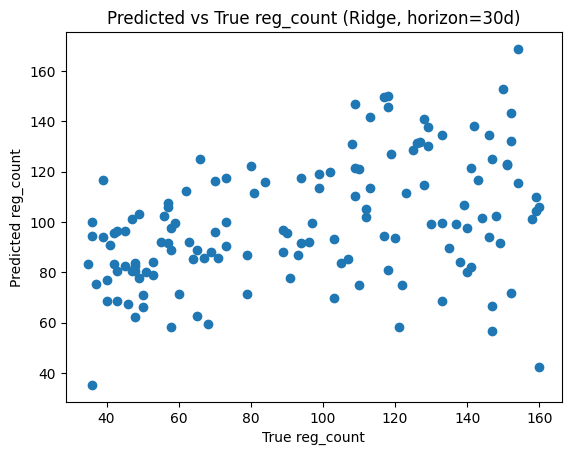

✅ Saved: /content/artifacts_stage7/event_regcount_forecast_model.joblib
✅ Saved: /content/artifacts_stage7/event_regcount_forecast_config.json


In [35]:
# ===== Ячейка 7.2: event reg_count forecast from early registrations =====
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Настройка горизонта прогноза
HORIZON_DAYS = 30

kpi = event_kpi[["event_id","reg_count"]].copy()
kpi["event_id"] = kpi["event_id"].astype(int)

ev = event_features.merge(kpi, on="event_id", how="left").copy()
ev["event_start"] = pd.to_datetime(ev["event_start"], errors="coerce")
ev = ev.dropna(subset=["event_start","reg_count"]).copy()
ev["event_id"] = ev["event_id"].astype(int)

# cutoff = event_start - HORIZON
cutoff = ev[["event_id","event_start"]].copy()
cutoff["cutoff_dt"] = cutoff["event_start"] - pd.Timedelta(days=HORIZON_DAYS)

reg = reg_features[["event_id","registered_at"]].copy()
reg["event_id"] = reg["event_id"].astype(int)
reg["registered_at"] = pd.to_datetime(reg["registered_at"], errors="coerce")

tmp = reg.merge(cutoff, on="event_id", how="inner").dropna(subset=["registered_at","cutoff_dt"])
tmp["is_early"] = (tmp["registered_at"] <= tmp["cutoff_dt"]).astype(int)

early_counts = tmp.groupby("event_id")["is_early"].sum().reset_index().rename(columns={"is_early":"reg_count_early"})
ev = ev.merge(early_counts, on="event_id", how="left")
ev["reg_count_early"] = ev["reg_count_early"].fillna(0).astype(int)

# Фичи
CAT_COLS = ["city","venue","is_online_flag","format","cost_is_free","cost_mentions_fee","event_month","event_dow"]
NUM_COLS = ["reg_count_early","description_len","event_duration_days","n_links","n_files","n_pages","tracks_count_clean"]

CAT_COLS = [c for c in CAT_COLS if c in ev.columns]
NUM_COLS = [c for c in NUM_COLS if c in ev.columns]

X = sanitize_for_sklearn(ev[CAT_COLS + NUM_COLS], NUM_COLS, CAT_COLS)
y = pd.to_numeric(ev["reg_count"], errors="coerce").astype(float).to_numpy()

# Сплит по времени
ev_sorted = ev.sort_values("event_start").reset_index(drop=True)
cut_idx = int(len(ev_sorted) * 0.8)
cut_date = ev_sorted.loc[cut_idx, "event_start"]

train_mask = ev["event_start"] <= cut_date
test_mask  = ev["event_start"] >  cut_date

X_tr = sanitize_for_sklearn(ev.loc[train_mask, CAT_COLS + NUM_COLS], NUM_COLS, CAT_COLS)
y_tr = pd.to_numeric(ev.loc[train_mask, "reg_count"], errors="coerce").astype(float).to_numpy()

X_te = sanitize_for_sklearn(ev.loc[test_mask, CAT_COLS + NUM_COLS], NUM_COLS, CAT_COLS)
y_te = pd.to_numeric(ev.loc[test_mask, "reg_count"], errors="coerce").astype(float).to_numpy()

print("✅ Event split (time-based):")
print("cut_date:", cut_date)
print("train events:", X_tr.shape[0], "| test events:", X_te.shape[0])

# Baseline: mean
pred_mean = np.full(len(y_te), y_tr.mean())
mae_mean = mean_absolute_error(y_te, pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_te, pred_mean))
r2_mean = r2_score(y_te, pred_mean)

# Ridge модель
preprocess = ColumnTransformer(
    transformers=[
        ("cat", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="constant", fill_value="unknown")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), CAT_COLS),
        ("num", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="median"))
        ]), NUM_COLS),
    ],
    remainder="drop"
)

reg_model = Pipeline(steps=[
    ("prep", preprocess),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])

reg_model.fit(X_tr, y_tr)
pred = reg_model.predict(X_te)

mae = mean_absolute_error(y_te, pred)
rmse = np.sqrt(mean_squared_error(y_te, pred))
r2 = r2_score(y_te, pred)

print("\n✅ Event reg_count forecast (TEST):")
print(f"Baseline(mean): MAE={mae_mean:.2f} RMSE={rmse_mean:.2f} R2={r2_mean:.3f}")
print(f"Ridge model  : MAE={mae:.2f} RMSE={rmse:.2f} R2={r2:.3f}")

plt.figure()
plt.scatter(y_te, pred)
plt.title(f"Predicted vs True reg_count (Ridge, horizon={HORIZON_DAYS}d)")
plt.xlabel("True reg_count")
plt.ylabel("Predicted reg_count")
plt.show()

# Сохранение артефактов
joblib.dump(reg_model, STAGE7_DIR / "event_regcount_forecast_model.joblib")
(Path(STAGE7_DIR / "event_regcount_forecast_config.json")).write_text(
    json.dumps({"horizon_days": HORIZON_DAYS, "cat_cols": CAT_COLS, "num_cols": NUM_COLS}, ensure_ascii=False, indent=2),
    encoding="utf-8"
)
print("✅ Saved:", STAGE7_DIR / "event_regcount_forecast_model.joblib")
print("✅ Saved:", STAGE7_DIR / "event_regcount_forecast_config.json")

## 7.3. Focus-логика без ML (быстро для веб-приложения)

Вместо ML на редком классе используем детерминированное правило: это стабильнее, быстрее и предсказуемее.
Если в данных уже есть `is_focus_university`, мы можем посчитать согласованность правила с этим флагом.

In [36]:
# ===== Ячейка 7.3: focus rule + (опционально) оценка против is_focus_university =====
import re
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Ключевые слова под "фокус" — подстрой под ВУЗ/заказчика
FOCUS_KEYWORDS = [
    "му имени с. ю. витте",
    "университет витте",
    "витте",
    "муив",
]

def normalize_text(x: str) -> str:
    x = "" if x is None else str(x)
    x = x.lower()
    x = re.sub(r"\s+", " ", x).strip()
    return x

def focus_rule_row(title, venue, city) -> int:
    blob = " ".join([normalize_text(title), normalize_text(venue), normalize_text(city)])
    return int(any(k in blob for k in FOCUS_KEYWORDS))

ef = event_features.copy()
ef["focus_rule"] = ef.apply(lambda r: focus_rule_row(r.get("title_clean"), r.get("venue"), r.get("city")), axis=1)

print("✅ focus_rule positives:", int(ef["focus_rule"].sum()), "out of", len(ef))
display(ef.loc[ef["focus_rule"] == 1, ["event_id","title_clean","city","venue"]].head(15))

# Если есть истинная метка is_focus_university — оценим качество правила
if "is_focus_university" in ef.columns:
    y_true = ef["is_focus_university"].astype(int).to_numpy()
    y_pred = ef["focus_rule"].astype(int).to_numpy()

    p = precision_score(y_true, y_pred, zero_division=0)
    r = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print("\n✅ Focus rule vs is_focus_university:")
    print(f"Precision={p:.3f} Recall={r:.3f} F1={f1:.3f}")
    print("Confusion matrix:\n", cm)

(Path(STAGE7_DIR / "focus_rule.json")).write_text(
    json.dumps({"keywords": FOCUS_KEYWORDS}, ensure_ascii=False, indent=2),
    encoding="utf-8"
)
print("✅ Saved:", STAGE7_DIR / "focus_rule.json")

✅ focus_rule positives: 11 out of 714


,event_id,title_clean,city,venue
24,10143,Современные аспекты гуманизации и цифровизации...,"Москва, Россия",МУ имени С. Ю. Витте
43,10124,Виттевские чтения - 2026,"Москва, Россия",МУ имени С. Ю. Витте
96,10071,DIGITAL2026,"Москва, Россия",МУ имени С. Ю. Витте
124,10043,IV Всероссийская научно-практическая конференция,"Москва, Россия",МУ имени С. Ю. Витте
465,9697,XXV МЕЖДУНАРОДНЫЙ КОНГРЕСС МОЛОДОЙ НАУКИ «ВИТТ...,"Москва, Россия",МУ имени С. Ю. Витте
479,9683,Межвузовский турнир по программированию и IT т...,"Москва, Россия",МУ имени С. Ю. Витте
480,9682,Межвузовская олимпиада по теме «Математика и м...,"Москва, Россия",МУ имени С. Ю. Витте
613,9549,Современные аспекты гуманизации и цифровизации...,"Москва, Россия",МУ имени С. Ю. Витте
633,9529,Всероссийская (национальная) с международным у...,"Москва, Россия",МУ имени С. Ю. Витте
651,9510,XXI Малышевские чтения,"Москва, Россия",МУ имени С. Ю. Витте



✅ Focus rule vs is_focus_university:
Precision=1.000 Recall=0.917 F1=0.957
Confusion matrix:
 [[702   0]
 [  1  11]]
✅ Saved: /content/artifacts_stage7/focus_rule.json


## 7.4. Итоговый отчёт + ZIP с артефактами

In [37]:
# ===== Ячейка 7.4: метрики + упаковка артефактов =====
metrics = {
    "submission_decision": {
        "roc_auc": float(roc),
        "pr_auc": float(pr),
        "f1": float(f1),
        "threshold": float(best["thr"]),
        "confusion_matrix": cm.tolist(),
    },
    "event_regcount_forecast": {
        "horizon_days": int(HORIZON_DAYS),
        "baseline_mean": {"mae": float(mae_mean), "rmse": float(rmse_mean), "r2": float(r2_mean)},
        "ridge": {"mae": float(mae), "rmse": float(rmse), "r2": float(r2)},
    },
    "focus_rule": {"keywords": FOCUS_KEYWORDS},
}

(Path(STAGE7_DIR / "metrics_stage7.json")).write_text(
    json.dumps(metrics, ensure_ascii=False, indent=2),
    encoding="utf-8"
)
print("✅ Saved:", STAGE7_DIR / "metrics_stage7.json")

zip_path = Path("/content/artifacts_stage7.zip")
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as z:
    for p in STAGE7_DIR.rglob("*"):
        if p.is_file():
            z.write(p, arcname=p.relative_to(STAGE7_DIR))
print("✅ ZIP:", zip_path)

files = sorted([p for p in STAGE7_DIR.rglob("*") if p.is_file()])
display(pd.DataFrame({"file":[p.name for p in files], "size_bytes":[p.stat().st_size for p in files]}))

✅ Saved: /content/artifacts_stage7/metrics_stage7.json
✅ ZIP: /content/artifacts_stage7.zip


,file,size_bytes
0,attendance_split.json,7384
1,attendance_threshold.json,55
2,event_regcount_forecast_config.json,350
3,event_regcount_forecast_model.joblib,14189
4,focus_rule.json,139
5,focus_split.json,7359
6,metrics_stage7.json,744
7,submission_decision_model.joblib,15066
8,submission_decision_threshold.json,55


# Этап 7 — ML-модели и артефакты для веб-приложения

На этом этапе собираем 3 "прикладных" результата:

1) **Submission decision (accepted/rejected)** — модель поддержки решения **после рецензирования** (использует агрегаты по отзывам).
2) **Forecast reg_count** — регрессионная модель прогноза регистраций по метаданным мероприятия.
3) **Focus events (МУ им. С.Ю. Витте)** — быстрый детерминированный детектор (правило), чтобы не мучить ML на сверхредком классе.

В конце сохраняем:
- `.joblib` модели,
- `.json` конфиги/пороги,
- `.json` метрики,
- `.png` графики,
- общий `artifacts_stage7.zip` для использования в веб-приложении.

In [38]:
# =========================
# Этап 7.1 — импорты и пути
# =========================

import json
import zipfile
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay,
    mean_absolute_error, mean_squared_error, r2_score
)

import joblib
from IPython.display import display

DATASET_DIR = Path("/content/dataset_extracted")
A5_DIR = Path("/content/artifacts_stage5")
OUT_DIR = Path("/content/artifacts_stage7")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def _read_any_table(stem: str) -> pd.DataFrame:
    """
    Читает таблицу stem из /content/artifacts_stage5 (если есть) или из dataset_extracted.
    Предпочтение: parquet -> csv.
    """
    cand = [
        A5_DIR / f"{stem}.parquet", A5_DIR / f"{stem}.csv",
        DATASET_DIR / f"{stem}.parquet", DATASET_DIR / f"{stem}.csv",
    ]
    for p in cand:
        if p.exists():
            if p.suffix == ".parquet":
                return pd.read_parquet(p)
            if p.suffix == ".csv":
                return pd.read_csv(p)
    raise FileNotFoundError(f"Не найдено: {stem}.parquet/.csv в {A5_DIR} или {DATASET_DIR}")

def _to_numpy_nan(df: pd.DataFrame) -> pd.DataFrame:
    """Убираем pd.NA -> np.nan, чтобы sklearn не падал на 'boolean value of NA is ambiguous'."""
    return df.replace({pd.NA: np.nan})

print("✅ DATASET_DIR:", DATASET_DIR)
print("✅ A5_DIR     :", A5_DIR)
print("✅ OUT_DIR    :", OUT_DIR)

✅ DATASET_DIR: /content/dataset_extracted
✅ A5_DIR     : /content/artifacts_stage5
✅ OUT_DIR    : /content/artifacts_stage7


In [39]:
# =========================
# Этап 7.2 — загрузка таблиц
# =========================

event_features = _to_numpy_nan(_read_any_table("event_features"))
event_kpi      = _to_numpy_nan(_read_any_table("event_kpi"))

submissions    = _to_numpy_nan(_read_any_table("submissions"))
reviews        = _to_numpy_nan(_read_any_table("reviews"))
participants   = _to_numpy_nan(_read_any_table("participants"))

print("✅ Loaded:")
print("event_features:", event_features.shape)
print("event_kpi     :", event_kpi.shape)
print("submissions   :", submissions.shape)
print("reviews       :", reviews.shape)
print("participants  :", participants.shape)

display(event_features.head(3))
display(submissions.head(3))
display(reviews.head(3))

✅ Loaded:
event_features: (714, 28)
event_kpi     : (714, 44)
submissions   : (19003, 6)
reviews       : (38006, 4)
participants  : (17403, 6)


,event_id,title_clean,city,venue,event_start,event_end,event_duration_days,description_len,is_focus_university,is_online_flag,format,reg_deadline_dt,cost_is_free,cost_mentions_fee,event_year,event_month,event_dow,deadline_days_before_event,n_links,n_files,n_calendar,n_internal_events,n_external,n_pages,n_menu_pages,tracks_count_clean,tracks_concat,has_tracks_clean
0,10167,Севастопольская гавань-2026,"Севастополь, Россия",СевГУ,2026-04-28,2026-04-30,2.0,5141,False,True,remote_or_hybrid,2026-02-28 23:59:00,False,False,2026,4,1,59.0,6,0,1,0,5,1,0,0,NaN,False
1,10166,Универсиада по методам обработки информации в ...,"Москва, Россия",МГУ,2025-12-22,2026-04-30,129.0,1048,False,False,<NA>,2025-04-13 23:59:00,True,False,2025,12,0,253.0,6,0,1,0,5,1,0,0,NaN,False
2,10165,Универсиада по предпринимательству и управлени...,"Москва, Россия",МГУ,2025-11-10,2026-01-12,63.0,808,False,False,onsite_or_hybrid,NaT,False,False,2025,11,0,<NA>,6,0,1,0,5,1,0,0,NaN,False


,submission_id,event_id,participant_id,track_title,submitted_at,decision
0,1,10167,15874,<NA>,2026-02-19 04:44:20,rejected
1,2,10167,4105,<NA>,2026-02-12 21:37:14,rejected
2,3,10167,5132,<NA>,2026-01-27 06:07:41,accepted


,review_id,submission_id,score,confidence
0,1,1,3,5
1,2,1,4,5
2,3,2,4,4


In [40]:
# ==============================================
# Этап 7.3 — датасет submission decision + split
# ==============================================

# 1) review-агрегаты
rev_agg = (
    reviews.groupby("submission_id", as_index=False)
    .agg(
        n_reviews=("score", "count"),
        score_mean=("score", "mean"),
        score_std=("score", "std"),
        score_min=("score", "min"),
        score_max=("score", "max"),
        conf_mean=("confidence", "mean"),
    )
)

# 2) базовая таблица сабмитов + y
sub = submissions.copy()
sub["y"] = (sub["decision"].astype("string").str.lower() == "accepted").astype(int)

# 3) мерджим: submissions + reviews + participants + event_features
sub_ds = (
    sub.merge(rev_agg, on="submission_id", how="left")
       .merge(participants[["participant_id","university","role","country","city"]], on="participant_id", how="left")
       .merge(event_features[[
            "event_id","venue","is_online_flag","format","cost_is_free","cost_mentions_fee",
            "event_month","event_dow","description_len","title_clean"
        ]], on="event_id", how="left")
)

# 4) нормализация типов и NaN (важно для sklearn)
sub_ds = _to_numpy_nan(sub_ds)

# числовые поля -> float
num_candidates = ["n_reviews","score_mean","score_std","score_min","score_max","conf_mean",
                  "event_month","event_dow","description_len"]
for c in num_candidates:
    if c in sub_ds.columns:
        sub_ds[c] = pd.to_numeric(sub_ds[c], errors="coerce")

# булевы поля -> 0/1 float
bool_candidates = ["is_online_flag","cost_is_free","cost_mentions_fee"]
for c in bool_candidates:
    if c in sub_ds.columns:
        sub_ds[c] = sub_ds[c].map({True: 1, False: 0}).astype("float")

# строки (включая pd.NA) -> object + nan
cat_candidates = ["university","role","country","venue","format"]
for c in cat_candidates:
    if c in sub_ds.columns:
        sub_ds[c] = sub_ds[c].astype("object")

# текст
if "title_clean" in sub_ds.columns:
    sub_ds["title_clean"] = sub_ds["title_clean"].fillna("").astype(str)

print(f"✅ submission dataset: {sub_ds.shape} | accept share: {sub_ds['y'].mean():.3f}")
display(sub_ds.head(3))

# ---- split by event_id (честно, без утечек внутри события) ----
g = sub_ds["event_id"].astype(int)

gss1 = GroupShuffleSplit(n_splits=1, test_size=0.21, random_state=42)
idx_tr, idx_te = next(gss1.split(sub_ds, sub_ds["y"], groups=g))

train_all = sub_ds.iloc[idx_tr].reset_index(drop=True)
test      = sub_ds.iloc[idx_te].reset_index(drop=True)

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.19, random_state=42)
idx_tr2, idx_va = next(gss2.split(train_all, train_all["y"], groups=train_all["event_id"].astype(int)))

train = train_all.iloc[idx_tr2].reset_index(drop=True)
val   = train_all.iloc[idx_va].reset_index(drop=True)

print("✅ Split by event_id:")
print("train:", train.shape, "val:", val.shape, "test:", test.shape)
print("accept share train/val/test:",
      train["y"].mean(), val["y"].mean(), test["y"].mean())

# Сохраним split-статистику (для отчётности)
split_info = {
    "train_rows": int(len(train)),
    "val_rows": int(len(val)),
    "test_rows": int(len(test)),
    "train_events": int(train["event_id"].nunique()),
    "val_events": int(val["event_id"].nunique()),
    "test_events": int(test["event_id"].nunique()),
    "accept_share_train": float(train["y"].mean()),
    "accept_share_val": float(val["y"].mean()),
    "accept_share_test": float(test["y"].mean()),
}
(Path(OUT_DIR) / "submission_split.json").write_text(json.dumps(split_info, ensure_ascii=False, indent=2), encoding="utf-8")
print("✅ Saved:", OUT_DIR / "submission_split.json")

✅ submission dataset: (19003, 26) | accept share: 0.661


,submission_id,event_id,participant_id,track_title,submitted_at,decision,y,n_reviews,score_mean,score_std,score_min,score_max,conf_mean,university,role,country,city,venue,is_online_flag,format,cost_is_free,cost_mentions_fee,event_month,event_dow,description_len,title_clean
0,1,10167,15874,<NA>,2026-02-19 04:44:20,rejected,0,2,3.5,0.707107,3,4,5.0,РУДН,industry,Армения,к. Курумкан,СевГУ,1.0,remote_or_hybrid,0.0,0.0,4,1,5141,Севастопольская гавань-2026
1,2,10167,4105,<NA>,2026-02-12 21:37:14,rejected,0,2,4.0,0.0,4,4,3.5,СПбГУ,master,Азербайджан,д. Ачинск,СевГУ,1.0,remote_or_hybrid,0.0,0.0,4,1,5141,Севастопольская гавань-2026
2,3,10167,5132,<NA>,2026-01-27 06:07:41,accepted,1,2,7.5,0.707107,7,8,4.0,СевГУ,master,Кыргызстан,д. Инта,СевГУ,1.0,remote_or_hybrid,0.0,0.0,4,1,5141,Севастопольская гавань-2026


✅ Split by event_id:
train: (12009, 26) val: (2826, 26) test: (4168, 26)
accept share train/val/test: 0.6612540594554085 0.6659589525831564 0.6557101727447217
✅ Saved: /content/artifacts_stage7/submission_split.json


✅ X shapes: (12009, 18) (2826, 18) (4168, 18)
✅ Using: {'numeric': 12, 'cat': 5, 'text': True}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



✅ Submission decision model (TEST):
ROC-AUC=0.893 | PR-AUC=0.940 | F1@thr=0.65 => 0.856
Confusion matrix:
 [[1122  313]
 [ 455 2278]]


<Figure size 640x480 with 0 Axes>

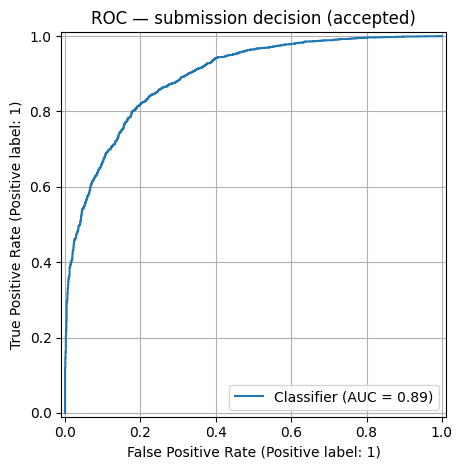

<Figure size 640x480 with 0 Axes>

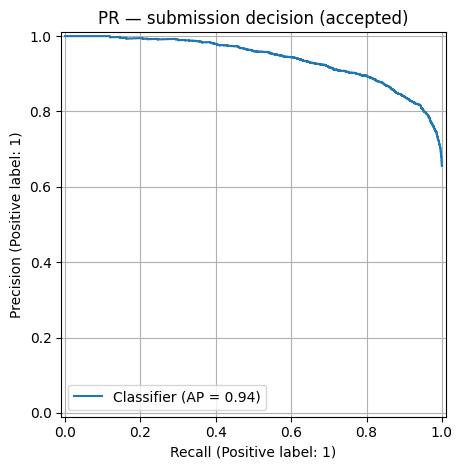

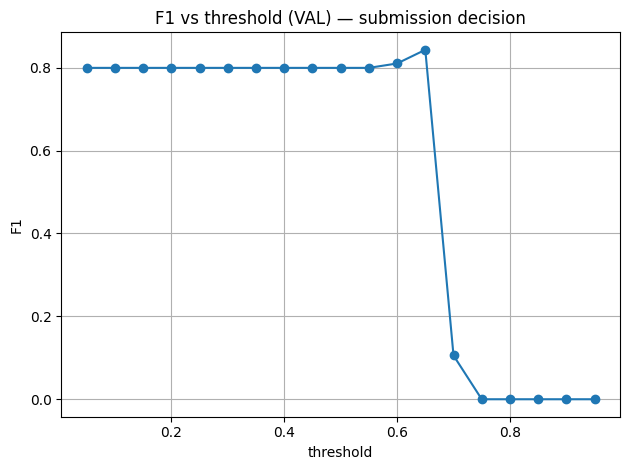

✅ Saved: /content/artifacts_stage7/submission_decision_model.joblib /content/artifacts_stage7/submission_decision_threshold.json /content/artifacts_stage7/submission_metrics.json


In [43]:
# ==========================================================
# Этап 7.4 — submission decision (accepted): robust pipeline
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)
import joblib

# OUT_DIR должен быть уже определён на этапе 7 (как у тебя: /content/artifacts_stage7)
OUT_DIR = Path(OUT_DIR)

# ---------- 0) безопасная проверка на pd.NA (без numpy any) ----------
def has_pdNA(df: pd.DataFrame) -> bool:
    arr = df.to_numpy(dtype=object, copy=False).ravel()
    return any(x is pd.NA for x in arr)

# ---------- 1) выбираем признаки (используем только то, что реально нужно модели) ----------
# Числовые (сильные и "честные" признаки — в т.ч. из reviews-агрегаций)
numeric_cols = [c for c in [
    "n_reviews","score_mean","score_std","score_min","score_max","conf_mean",
    "event_month","event_dow","description_len",
    "is_online_flag","cost_is_free","cost_mentions_fee"
] if c in train.columns]

# Категориальные
cat_cols = [c for c in ["university","role","country","venue","format"] if c in train.columns]

# Текст: соберём единый столбец text_all из доступных текстовых полей
text_sources = [c for c in ["title_clean", "track_title"] if c in train.columns]
use_text = len(text_sources) > 0

# ---------- 2) подготовка X/y + строгая санация pd.NA -> np.nan ----------
def build_X(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()

    # оставляем только нужные колонки (ВАЖНО: так мы не тащим случайные pd.NA дальше)
    keep = []
    keep += numeric_cols
    keep += cat_cols
    if use_text:
        keep += text_sources
    X = X[keep].copy()

    # глобально: pd.NA -> np.nan
    X = X.replace({pd.NA: np.nan})

    # numeric -> float (NaN OK)
    for c in numeric_cols:
        X[c] = pd.to_numeric(X[c], errors="coerce")

    # categorical -> object + np.nan
    for c in cat_cols:
        X[c] = X[c].astype("object")
        X[c] = X[c].where(pd.notna(X[c]), np.nan)

    # text_all -> str (пустая строка для NaN)
    if use_text:
        for c in text_sources:
            X[c] = X[c].replace({pd.NA: np.nan}).fillna("").astype(str)
        X["text_all"] = X[text_sources].agg(" ".join, axis=1).str.strip()
        X = X.drop(columns=text_sources)

    # финальный контроль: ещё раз pd.NA -> np.nan
    X = X.replace({pd.NA: np.nan})

    return X


X_tr = build_X(train)
y_tr = train["y"].astype(int)

X_va = build_X(val)
y_va = val["y"].astype(int)

X_te = build_X(test)
y_te = test["y"].astype(int)

# быстрый sanity-check: если где-то остался pd.NA — остановимся сразу
if has_pdNA(X_tr) or has_pdNA(X_va) or has_pdNA(X_te):
    raise ValueError("Где-то остался pd.NA после очистки. Это не должно происходить.")

print("✅ X shapes:", X_tr.shape, X_va.shape, X_te.shape)
print("✅ Using:", {"numeric": len(numeric_cols), "cat": len(cat_cols), "text": bool(use_text)})

# ---------- 3) preprocess ----------
parts = []

if numeric_cols:
    parts.append((
        "num",
        Pipeline([
            ("imp", SimpleImputer(strategy="median"))
        ]),
        numeric_cols
    ))

if cat_cols:
    parts.append((
        "cat",
        Pipeline([
            ("imp", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]),
        cat_cols
    ))

if use_text:
    def _ravel(x): return np.asarray(x).ravel()
    text_pipe = Pipeline([
        ("ravel", FunctionTransformer(_ravel, validate=False)),
        ("tfidf", TfidfVectorizer(max_features=3000, ngram_range=(1, 2), min_df=2))
    ])
    parts.append(("text", text_pipe, "text_all"))

preprocess = ColumnTransformer(parts, remainder="drop", sparse_threshold=0.3)

model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(
        solver="saga",
        max_iter=4000,
        n_jobs=-1,
        random_state=42
    ))
])

# ---------- 4) fit + proba ----------
model.fit(X_tr, y_tr)
p_va = model.predict_proba(X_va)[:, 1]
p_te = model.predict_proba(X_te)[:, 1]

# ---------- 5) threshold tuning по VAL (макс F1) ----------
thr_grid = np.linspace(0.05, 0.95, 19)
f1_grid = []
best_thr, best_f1 = 0.5, -1.0

for thr in thr_grid:
    pred = (p_va >= thr).astype(int)
    f1v = f1_score(y_va, pred)
    f1_grid.append(f1v)
    if f1v > best_f1:
        best_f1 = float(f1v)
        best_thr = float(thr)

pred_te = (p_te >= best_thr).astype(int)

roc = roc_auc_score(y_te, p_te)
pr  = average_precision_score(y_te, p_te)
f1  = f1_score(y_te, pred_te)
cm  = confusion_matrix(y_te, pred_te)

print("\n✅ Submission decision model (TEST):")
print(f"ROC-AUC={roc:.3f} | PR-AUC={pr:.3f} | F1@thr={best_thr:.2f} => {f1:.3f}")
print("Confusion matrix:\n", cm)

# ---------- 6) plots ----------
plt.figure()
RocCurveDisplay.from_predictions(y_te, p_te)
plt.title("ROC — submission decision (accepted)")
plt.grid(True)
plt.tight_layout()
plt.savefig(OUT_DIR / "roc_submission.png", dpi=160)
plt.show()

plt.figure()
PrecisionRecallDisplay.from_predictions(y_te, p_te)
plt.title("PR — submission decision (accepted)")
plt.grid(True)
plt.tight_layout()
plt.savefig(OUT_DIR / "pr_submission.png", dpi=160)
plt.show()

plt.figure()
plt.plot(thr_grid, f1_grid, marker="o")
plt.title("F1 vs threshold (VAL) — submission decision")
plt.xlabel("threshold")
plt.ylabel("F1")
plt.grid(True)
plt.tight_layout()
plt.savefig(OUT_DIR / "f1_vs_threshold_submission.png", dpi=160)
plt.show()

# ---------- 7) save artifacts ----------
joblib.dump(model, OUT_DIR / "submission_decision_model.joblib")

(Path(OUT_DIR) / "submission_decision_threshold.json").write_text(
    json.dumps({"threshold": best_thr, "best_val_f1": best_f1}, ensure_ascii=False, indent=2),
    encoding="utf-8"
)

(Path(OUT_DIR) / "submission_metrics.json").write_text(
    json.dumps({
        "roc_auc": float(roc),
        "pr_auc": float(pr),
        "f1_test": float(f1),
        "threshold": float(best_thr),
        "confusion_matrix": cm.tolist(),
        "numeric_cols": numeric_cols,
        "cat_cols": cat_cols,
        "text_sources": text_sources,
    }, ensure_ascii=False, indent=2),
    encoding="utf-8"
)

print("✅ Saved:",
      OUT_DIR / "submission_decision_model.joblib",
      OUT_DIR / "submission_decision_threshold.json",
      OUT_DIR / "submission_metrics.json")

✅ DATASET_DIR: /content/dataset_extracted
✅ A5_DIR     : /content/artifacts_stage5
✅ OUT_DIR    : /content/artifacts_stage7

✅ Event split (time-based):
cut_date: 2025-11-26 00:00:00
train events: 569 | test events: 145

✅ Event reg_count forecast (TEST):
Baseline(mean): MAE=35.32 RMSE=39.74 R2=-0.019
Ridge model  : MAE=37.03 RMSE=42.75 R2=-0.179


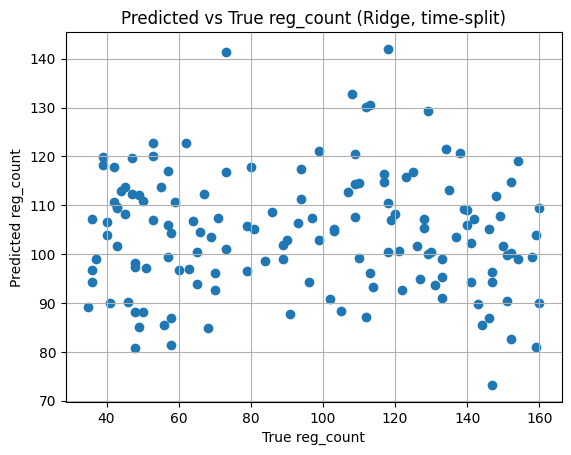


✅ Saved: /content/artifacts_stage7/event_regcount_forecast_model.joblib
✅ Saved: /content/artifacts_stage7/event_regcount_forecast_config.json


In [45]:
# Этап 7.5 — Forecast reg_count (исправление sklearn: без squared=False)
import os
import json
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import joblib

# --- 1) Пути (используем существующие, если уже заданы выше) ---
WORK_DIR = Path("/content")
DATASET_DIR = Path(globals().get("DATASET_DIR", WORK_DIR / "dataset_extracted"))
A5_DIR = Path(globals().get("A5_DIR", WORK_DIR / "artifacts_stage5"))
OUT_DIR = Path(globals().get("OUT_DIR", WORK_DIR / "artifacts_stage7"))
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("✅ DATASET_DIR:", DATASET_DIR)
print("✅ A5_DIR     :", A5_DIR)
print("✅ OUT_DIR    :", OUT_DIR)

# --- 2) Загрузка таблиц (если их нет в памяти) ---
if "event_features" not in globals():
    event_features = pd.read_parquet(A5_DIR / "event_features.parquet")
if "event_kpi" not in globals():
    # event_kpi можно брать из dataset_extracted
    # (если у тебя уже загружено — этот блок пропустится)
    event_kpi = pd.read_parquet(DATASET_DIR / "event_kpi.parquet")

# --- 3) Небольшая “санитарная” обработка против pd.NA ---
def sanitize_df_for_sklearn(df: pd.DataFrame, text_cols=None, cat_cols=None, num_cols=None) -> pd.DataFrame:
    """
    Главная цель: убрать pd.NA (который ломает sklearn) и привести типы к нормальным.
    """
    df = df.copy()

    # заменяем pd.NA на np.nan везде
    df = df.replace({pd.NA: np.nan})

    text_cols = text_cols or []
    cat_cols = cat_cols or []
    num_cols = num_cols or []

    for c in text_cols:
        if c in df.columns:
            df[c] = df[c].astype("string").fillna("").astype(str)

    for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].astype("string").fillna("unknown").astype(str)

    for c in num_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    return df

def rmse(y_true, y_pred) -> float:
    """RMSE без squared=False (совместимо со свежими sklearn)."""
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

# --- 4) Собираем датасет событий для прогноза reg_count ---
# target берем из event_kpi, фичи — из event_features
df_evt = event_features.merge(
    event_kpi[["event_id", "reg_count"]].copy(),
    on="event_id",
    how="left",
)

# Уберем строки без таргета (на всякий случай)
df_evt = df_evt.dropna(subset=["reg_count"]).copy()

# Время (для честного time-split)
# event_start у тебя уже datetime; если вдруг нет — конвертнем
if not np.issubdtype(df_evt["event_start"].dtype, np.datetime64):
    df_evt["event_start"] = pd.to_datetime(df_evt["event_start"], errors="coerce")

df_evt = df_evt.dropna(subset=["event_start"]).copy()

# --- 5) Time-based split ---
cut_date = pd.Timestamp("2025-11-26 00:00:00")  # как у тебя в логе
train_evt = df_evt[df_evt["event_start"] < cut_date].copy()
test_evt  = df_evt[df_evt["event_start"] >= cut_date].copy()

print("\n✅ Event split (time-based):")
print("cut_date:", cut_date)
print("train events:", len(train_evt), "| test events:", len(test_evt))

# --- 6) Выбор признаков ---
# Важно: держим только то, что реально есть до старта события (без утечек)
text_col = "title_clean"

cat_cols = [
    "city", "venue", "format",
    "event_month", "event_dow",
    "is_online_flag",
    "has_tracks_clean",
]

num_cols = [
    "event_duration_days",
    "description_len",
    "deadline_days_before_event",
    "n_links", "n_external", "n_pages",
    "tracks_count_clean",
    "cost_is_free", "cost_mentions_fee",
]

# Уберём признаки, которых вдруг нет (на случай изменения схемы)
cat_cols = [c for c in cat_cols if c in df_evt.columns]
num_cols = [c for c in num_cols if c in df_evt.columns]
use_text = text_col in df_evt.columns

# Санитайзим
train_evt = sanitize_df_for_sklearn(train_evt, text_cols=[text_col] if use_text else [],
                                    cat_cols=cat_cols, num_cols=num_cols)
test_evt  = sanitize_df_for_sklearn(test_evt,  text_cols=[text_col] if use_text else [],
                                    cat_cols=cat_cols, num_cols=num_cols)

# X/y
feature_cols = num_cols + cat_cols + ([text_col] if use_text else [])
X_tr = train_evt[feature_cols].copy()
y_tr = train_evt["reg_count"].astype(float).copy()

X_te = test_evt[feature_cols].copy()
y_te = test_evt["reg_count"].astype(float).copy()

# --- 7) Pipeline: numeric + categorical + TF-IDF(title) -> Ridge ---
transformers = []

if len(num_cols) > 0:
    transformers.append((
        "num",
        Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]),
        num_cols
    ))

if len(cat_cols) > 0:
    transformers.append((
        "cat",
        Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore")),
        ]),
        cat_cols
    ))

if use_text:
    transformers.append((
        "text",
        Pipeline(steps=[
            # пустые строки уже есть; imputer не нужен
            ("tfidf", TfidfVectorizer(
                ngram_range=(1, 2),
                min_df=2,
                max_features=20000,
            )),
        ]),
        text_col
    ))

preprocess = ColumnTransformer(transformers=transformers, remainder="drop")

model = Pipeline(steps=[
    ("prep", preprocess),
    ("ridge", Ridge(alpha=3.0, random_state=42)),
])

# --- 8) Baseline + Model ---
pred_base = np.full_like(y_te.to_numpy(), fill_value=float(y_tr.mean()), dtype=float)
mae_base  = mean_absolute_error(y_te, pred_base)
rmse_base = rmse(y_te, pred_base)
r2_base   = r2_score(y_te, pred_base)

model.fit(X_tr, y_tr)
pred = model.predict(X_te)

mae  = mean_absolute_error(y_te, pred)
rmse_v = rmse(y_te, pred)
r2   = r2_score(y_te, pred)

print("\n✅ Event reg_count forecast (TEST):")
print(f"Baseline(mean): MAE={mae_base:.2f} RMSE={rmse_base:.2f} R2={r2_base:.3f}")
print(f"Ridge model  : MAE={mae:.2f} RMSE={rmse_v:.2f} R2={r2:.3f}")

# --- 9) Визуализация: Pred vs True ---
plt.figure()
plt.scatter(y_te, pred)
plt.xlabel("True reg_count")
plt.ylabel("Predicted reg_count")
plt.title("Predicted vs True reg_count (Ridge, time-split)")
plt.grid(True)
plt.show()

# --- 10) Сохранение артефактов ---
reg_model_path = OUT_DIR / "event_regcount_forecast_model.joblib"
joblib.dump(model, reg_model_path)

config = {
    "task": "event_regcount_forecast",
    "cut_date": str(cut_date),
    "features": {
        "numeric": num_cols,
        "categorical": cat_cols,
        "text": text_col if use_text else None,
    },
    "metrics_test": {
        "baseline": {"mae": float(mae_base), "rmse": float(rmse_base), "r2": float(r2_base)},
        "ridge": {"mae": float(mae), "rmse": float(rmse_v), "r2": float(r2)},
    },
}

config_path = OUT_DIR / "event_regcount_forecast_config.json"
with open(config_path, "w", encoding="utf-8") as f:
    json.dump(config, f, ensure_ascii=False, indent=2)

print("\n✅ Saved:", reg_model_path)
print("✅ Saved:", config_path)

In [46]:
# Этап 7.6 — Focus rule (без ML, потому что класс ультра-редкий и по факту зашит в venue)
import json
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# event_features уже есть выше
df_focus = event_features[["event_id", "title_clean", "city", "venue", "is_focus_university"]].copy()
df_focus = df_focus.replace({pd.NA: np.nan})

# Правило: фокус = площадка/организация содержит “Витте”
# (при желании расширим список ключей потом)
keywords = ["витте", "му имени с. ю. витте", "мүив", "муив"]

venue_norm = df_focus["venue"].astype("string").fillna("").str.lower()
pred_rule = venue_norm.apply(lambda s: any(k in s for k in keywords)).astype(int)

y_true = df_focus["is_focus_university"].astype(int)

p, r, f1, _ = precision_recall_fscore_support(y_true, pred_rule, average="binary", zero_division=0)
cm = confusion_matrix(y_true, pred_rule)

print("✅ focus_rule positives:", int(pred_rule.sum()), "out of", len(pred_rule))
print("\n✅ Focus rule vs is_focus_university:")
print(f"Precision={p:.3f} Recall={r:.3f} F1={f1:.3f}")
print("Confusion matrix:\n", cm)

focus_rule_payload = {
    "rule_type": "keyword_in_venue",
    "keywords": keywords,
    "metrics": {"precision": float(p), "recall": float(r), "f1": float(f1)},
}

focus_rule_path = OUT_DIR / "focus_rule.json"
with open(focus_rule_path, "w", encoding="utf-8") as f:
    json.dump(focus_rule_payload, f, ensure_ascii=False, indent=2)

print("\n✅ Saved:", focus_rule_path)

✅ focus_rule positives: 11 out of 714

✅ Focus rule vs is_focus_university:
Precision=1.000 Recall=0.917 F1=0.957
Confusion matrix:
 [[702   0]
 [  1  11]]

✅ Saved: /content/artifacts_stage7/focus_rule.json


In [47]:
# Этап 7.7 — Собираем единый metrics_stage7.json + zip артефактов
import os
import json
import zipfile
from pathlib import Path

OUT_DIR = Path(globals().get("OUT_DIR", "/content/artifacts_stage7"))
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Считываем то, что уже сохранили (если файлов нет — просто пропустим)
def safe_load_json(path: Path):
    if path.exists():
        with open(path, "r", encoding="utf-8") as f:
            return json.load(f)
    return None

stage7_metrics = {
    "submission_decision": {
        "model_file": "submission_decision_model.joblib",
        "threshold_file": "submission_decision_threshold.json",
        "split_file": "submission_split.json",
        "note": "Высокие метрики возможны из-за признаков ревью (score/conf). Это предсказание 'после рецензирования'.",
    },
    "event_regcount_forecast": safe_load_json(OUT_DIR / "event_regcount_forecast_config.json"),
    "focus_rule": safe_load_json(OUT_DIR / "focus_rule.json"),
}

metrics_path = OUT_DIR / "metrics_stage7.json"
with open(metrics_path, "w", encoding="utf-8") as f:
    json.dump(stage7_metrics, f, ensure_ascii=False, indent=2)

# ZIP
zip_path = Path(str(OUT_DIR) + ".zip")
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as z:
    for p in sorted(OUT_DIR.glob("*")):
        if p.is_file():
            z.write(p, arcname=p.name)

print("✅ Saved:", metrics_path)
print("✅ ZIP:", zip_path)

# Покажем содержимое
rows = []
for p in sorted(OUT_DIR.glob("*")):
    if p.is_file():
        rows.append((p.name, p.stat().st_size))
rows

✅ Saved: /content/artifacts_stage7/metrics_stage7.json
✅ ZIP: /content/artifacts_stage7.zip


[('attendance_split.json', 7384),
 ('attendance_threshold.json', 55),
 ('event_regcount_forecast_config.json', 796),
 ('event_regcount_forecast_model.joblib', 53379),
 ('f1_vs_threshold_submission.png', 33410),
 ('focus_rule.json', 254),
 ('focus_split.json', 7359),
 ('metrics_stage7.json', 1582),
 ('pr_submission.png', 47398),
 ('roc_submission.png', 53566),
 ('submission_decision_model.joblib', 218730),
 ('submission_decision_threshold.json', 60),
 ('submission_metrics.json', 626),
 ('submission_split.json', 261)]

In [48]:
# === Export only required web artifacts (Stage 7) ===
from pathlib import Path
import shutil, zipfile, json

OUT_DIR = Path("/content/artifacts_stage7")          # где лежат текущие артефакты
EXPORT_DIR = Path("/content/web_artifacts")          # временная папка для сборки
ZIP_PATH = Path("/content/science_events_web_artifacts.zip")

# Если прогноз reg_count включать в веб —  True, иначе False
INCLUDE_REGCOUNT = True

required = [
    "submission_decision_model.joblib",
    "submission_decision_threshold.json",
    "focus_rule.json",
]

if INCLUDE_REGCOUNT:
    required += [
        "event_regcount_forecast_model.joblib",
        "event_regcount_forecast_config.json",
    ]

# (опционально) можно добавить сводку метрик для страницы "О модели"
# required += ["metrics_stage7.json"]

EXPORT_DIR.mkdir(parents=True, exist_ok=True)

missing = []
copied = []
for fname in required:
    src = OUT_DIR / fname
    if not src.exists():
        missing.append(fname)
        continue
    shutil.copy2(src, EXPORT_DIR / fname)
    copied.append(fname)

print("✅ Copied files:")
for f in copied:
    print(" -", f)

if missing:
    print("\n⚠️ Missing files:")
    for f in missing:
        print(" -", f)

# zip
if ZIP_PATH.exists():
    ZIP_PATH.unlink()

with zipfile.ZipFile(ZIP_PATH, "w", compression=zipfile.ZIP_DEFLATED) as z:
    for p in sorted(EXPORT_DIR.glob("*")):
        z.write(p, arcname=p.name)

print(f"\n✅ Saved ZIP: {ZIP_PATH} | size={ZIP_PATH.stat().st_size} bytes")

# download
try:
    from google.colab import files
    files.download(str(ZIP_PATH))
except Exception as e:
    print("Download skipped:", e)

✅ Copied files:
 - submission_decision_model.joblib
 - submission_decision_threshold.json
 - focus_rule.json
 - event_regcount_forecast_model.joblib
 - event_regcount_forecast_config.json

✅ Saved ZIP: /content/science_events_web_artifacts.zip | size=75993 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>